## Load df

In [1]:
import pandas as pd
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
DATASET_DIR = "music_audio_benchmark"
FEATURE_NAME = "mfccs_without_0"
EXECUTE_PCA = False

In [3]:
project_dir = os.path.relpath(os.path.join(os.getcwd(), os.pardir))
features_dir = os.path.join(project_dir, "features")

dataset_dir = os.path.join(features_dir, DATASET_DIR)

csv_file_name = "features.csv"
csv_file_path = os.path.join(dataset_dir, csv_file_name)

In [4]:
print("=== ORIGINAL DF ===")
df = pd.read_csv(csv_file_path)
display(df.head())

feature_columns =[
        'name', 'duration', 'tempo', 
        'chroma_key_1', 'chroma_key_2', 'chroma_key_3', 
        'mean_root_square_mean', 'mean_zero_crossing_rate', 
        'mean_spectral_centroid', 'mean_spectral_bandwith', 'mean_spectral_roll_off', 
        'label'
    ]

print("=== FEATURES ===")
df_features = df[feature_columns].copy()
display(df_features.head())

path_columns = [
    'name', 'path', 
    'path_spectrogram_img', 'path_spectrogram_arr', 
    'path_mel_spectrogram_img', 'path_mel_spectrogram_arr', 
    'path_chromagram_img', 'path_chromagram_arr', 
    'path_mfccs_img', 'path_mfccs_arr', 'path_mfccs_without_0_img', 'path_mfccs_without_0_arr', 
    'label'
]

print("=== PATHS ===")
df_paths = df[path_columns].copy()
display(df_paths.head())

=== ORIGINAL DF ===


name  duration    tempo chroma_key_1  \
0              50_Minutes-Colours    10.057   76.000            B   
1            50_Minutes-Nightwalk    10.057   95.703            F   
2       50_Minutes-The_Great_Wall    10.057  129.199            C   
3  Abigail_Lapell-Dress_Rehearsal    10.057  143.555            G   
4        Albino_Catfish-Ice_Cream    10.057  135.999           G#   

  chroma_key_2 chroma_key_3  mean_root_square_mean  mean_zero_crossing_rate  \
0            E            G                  0.191                    0.036   
1            D            A                  0.119                    0.033   
2            B            E                  0.204                    0.043   
3            F           F#                  0.124                    0.074   
4           C#            A                  0.153                    0.130   

   mean_spectral_centroid  mean_spectral_bandwith  ...  \
0                1273.531                1855.464  ...   
1                 804.627                1259.184  ...   
2                1134.791                1568.345  ...   
3                1545.983                1712.078  ...   
4                2204.771                1935.882  ...   

                                path_spectrogram_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mel_spectrogram_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mel_spectrogram_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                 path_chromagram_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                 path_chromagram_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                      path_mfccs_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                      path_mfccs_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mfccs_without_0_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mfccs_without_0_arr        label  
0  ..\features\music_audio

=== FEATURES ===


name  duration    tempo chroma_key_1  \
0              50_Minutes-Colours    10.057   76.000            B   
1            50_Minutes-Nightwalk    10.057   95.703            F   
2       50_Minutes-The_Great_Wall    10.057  129.199            C   
3  Abigail_Lapell-Dress_Rehearsal    10.057  143.555            G   
4        Albino_Catfish-Ice_Cream    10.057  135.999           G#   

  chroma_key_2 chroma_key_3  mean_root_square_mean  mean_zero_crossing_rate  \
0            E            G                  0.191                    0.036   
1            D            A                  0.119                    0.033   
2            B            E                  0.204                    0.043   
3            F           F#                  0.124                    0.074   
4           C#            A                  0.153                    0.130   

   mean_spectral_centroid  mean_spectral_bandwith  mean_spectral_roll_off  \
0                1273.531                1855.464                2898.002   
1                 804.627                1259.184                1517.719   
2                1134.791                1568.345                2465.973   
3                1545.983                1712.078                3060.741   
4                2204.771                1935.882                4186.124   

         label  
0  alternative  
1  alternative  
2  alternative  
3  alternative  
4  alternative

=== PATHS ===


name  \
0              50_Minutes-Colours   
1            50_Minutes-Nightwalk   
2       50_Minutes-The_Great_Wall   
3  Abigail_Lapell-Dress_Rehearsal   
4        Albino_Catfish-Ice_Cream   

                                                path  \
0  C:\users\user\studia\audio_clustering_autoenco...   
1  C:\users\user\studia\audio_clustering_autoenco...   
2  C:\users\user\studia\audio_clustering_autoenco...   
3  C:\users\user\studia\audio_clustering_autoenco...   
4  C:\users\user\studia\audio_clustering_autoenco...   

                                path_spectrogram_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                path_spectrogram_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mel_spectrogram_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mel_spectrogram_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                 path_chromagram_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                 path_chromagram_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                      path_mfccs_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                      path_mfccs_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mfccs_without_0_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mfccs_without_0_arr        label  
0  ..\features\music_audio_benchmark\alternative\...  alternative  
1  ..\features\music_audio_benchmark\alternative\...  alternative  
2  ..\features\music_audio_benchmark\alternative\...  alternative  
3  ..\features\music_audio_benchmark\alternative\...  alternative  
4  ..\features\music_audio_benchmark\alternative\...  alternative

In [5]:
NUMBER_UNIQUE_LABELS = df['label'].nunique()

label_encoder = LabelEncoder()
ORIGINAL_LABELS = label_encoder.fit_transform(df['label'])

CLUSTER_NAMES = df['label'].unique()

In [6]:
path_arr_columns = [
    'path_spectrogram_arr',
    'path_mel_spectrogram_arr',
    'path_chromagram_arr',
    'path_mfccs_arr',
    'path_mfccs_without_0_arr'
]

path_img_columns = [
    'path_spectrogram_img',
    'path_mel_spectrogram_img',
    'path_chromagram_img',
    'path_mfccs_img',
    'path_mfccs_without_0_img'
]

def load_image(path):
    image = Image.open(path)
    # convert rgba to grayscale
    if image.mode != 'L':
        image = image.convert('L')
        
    return image

def load_numpy_array(path):
    return np.load(path)

def calculate_mean(path):
    arr = load_numpy_array(path)
    return np.mean(arr)

def calculate_mean_across_column(path):
    arr = load_numpy_array(path)
    return np.mean(arr, axis=0)

def calculate_mean_across_row(path):
    arr = load_numpy_array(path)
    return np.mean(arr, axis=1)

def calculate_mean_across_column_image(path):
    img = load_image(path)
    arr = np.array(img)
    return np.mean(arr, axis=0)

def calculate_mean_across_row_image(path):
    img = load_image(path)
    arr = np.array(img)
    return np.mean(arr, axis=1)

def get_mean_df():
    mean_df = pd.DataFrame()

    for column in path_arr_columns:
        mean_column_name = column.replace('path', 'mean')
        mean_column_name = mean_column_name.replace('_arr', '')
        mean_df[mean_column_name] = df_paths[column].apply(
            lambda path: calculate_mean(path)
        )

#     print("=== MEAN PATHS ===")
#     print(mean_df)
    return mean_df

def get_mean_by_column_df(df_paths, column_name):    
    means_series = df_paths[column_name].apply(calculate_mean_across_row) 
#     means_series = df_paths[column_name].apply(calculate_mean_across_row) 
    mean_df = pd.DataFrame(means_series.tolist(), index=df_paths.index)
    mean_df.columns = [f'{column_name}_{index}' for index in mean_df.columns]
    return mean_df

def get_images_df(df_paths, column_name):
    means_series = df_paths[column_name].apply(calculate_mean_across_row_image)
    mean_df = pd.DataFrame(means_series.tolist(), index=df_paths.index)
    mean_df.columns = [f'{column_name}_{index}' for index in mean_df.columns]
    return mean_df

In [7]:
imgs_df = get_images_df(df_paths, f'path_{FEATURE_NAME}_img')

# fill na with df mean
imgs_df.fillna(imgs_df.mean(), inplace=True)
imgs_df.head(5)

path_mfccs_without_0_img_0  path_mfccs_without_0_img_1  \
0                   41.980645                   41.980645   
1                   39.881720                   39.881720   
2                   46.572043                   46.572043   
3                   93.651613                   93.651613   
4                   84.378495                   84.378495   

   path_mfccs_without_0_img_2  path_mfccs_without_0_img_3  \
0                   41.980645                   41.980645   
1                   39.881720                   39.881720   
2                   46.572043                   46.572043   
3                   93.651613                   93.651613   
4                   84.378495                   84.378495   

   path_mfccs_without_0_img_4  path_mfccs_without_0_img_5  \
0                   41.980645                   41.980645   
1                   39.881720                   39.881720   
2                   46.572043                   46.572043   
3                   93.651613                   93.651613   
4                   84.378495                   84.378495   

   path_mfccs_without_0_img_6  path_mfccs_without_0_img_7  \
0                   41.980645                   41.980645   
1                   39.881720                   39.881720   
2                   46.572043                   46.572043   
3                   93.651613                   93.651613   
4                   84.378495                   84.378495   

   path_mfccs_without_0_img_8  path_mfccs_without_0_img_9  ...  \
0                   41.980645                   41.980645  ...   
1                   39.881720                   39.881720  ...   
2                   46.572043                   46.572043  ...   
3                   93.651613                   93.651613  ...   
4                   84.378495                   84.378495  ...   

   path_mfccs_without_0_img_221  path_mfccs_without_0_img_222  \
0                    200.135484                    200.135484   
1                    205.107527                    205.107527   
2                    208.219355                    208.219355   
3                    209.047312                    209.047312   
4                    194.098925                    194.098925   

   path_mfccs_without_0_img_223  path_mfccs_without_0_img_224  \
0                    200.135484                    200.135484   
1                    205.107527                    205.107527   
2                    208.219355                    208.219355   
3                    209.047312                    209.047312   
4                    194.098925                    194.098925   

   path_mfccs_without_0_img_225  path_mfccs_without_0_img_226  \
0                    200.135484                    200.135484   
1                    205.107527                    205.107527   
2                    208.219355                    208.219355   
3                    209.047312                    209.047312   
4                    194.098925                    194.098925   

   path_mfccs_without_0_img_227  path_mfccs_without_0_img_228  \
0                    200.135484                    200.135484   
1                    205.107527                    205.107527   
2                    208.219355                    208.219355   
3                    209.047312                    209.047312   
4                    194.098925                    194.098925   

   path_mfccs_without_0_img_229  path_mfccs_without_0_img_230  
0                    200.135484                    200.135484  
1                    205.107527                    205.107527  
2                    208.219355                    208.219355  
3                    209.047312                    209.047312  
4                    194.098925                    194.098925  

[5 rows x 231 columns]

In [8]:
# mean_df = get_mean_df()
long_mean_df = get_mean_by_column_df(df_paths, f'path_{FEATURE_NAME}_arr')

# fill na with df mean
long_mean_df.fillna(long_mean_df.mean(), inplace=True)
long_mean_df.head()

path_mfccs_without_0_arr_0  path_mfccs_without_0_arr_1  \
0                  137.246994                   13.503139   
1                  176.087234                   12.207649   
2                  150.913757                  -18.866024   
3                  126.429298                  -30.741247   
4                   92.791306                  -38.351959   

   path_mfccs_without_0_arr_2  path_mfccs_without_0_arr_3  \
0                   43.539665                  -13.858698   
1                   53.309547                   -6.039835   
2                   52.024418                   -5.720568   
3                   36.679989                   -2.907137   
4                   69.578514                   -1.630334   

   path_mfccs_without_0_arr_4  path_mfccs_without_0_arr_5  \
0                   35.666611                  -13.135281   
1                   22.718842                  -11.012799   
2                   37.050850                   -4.064023   
3                    9.668455                    0.040765   
4                    6.769746                  -44.764423   

   path_mfccs_without_0_arr_6  path_mfccs_without_0_arr_7  \
0                   12.611642                   -7.492907   
1                    7.910008                  -10.955231   
2                   14.888664                   -3.275478   
3                   11.070939                  -13.083029   
4                   25.588381                  -21.142775   

   path_mfccs_without_0_arr_8  path_mfccs_without_0_arr_9  \
0                    9.846860                  -10.774839   
1                    3.435458                   -6.907793   
2                    5.037826                   -7.388868   
3                   10.921363                  -13.731966   
4                    5.369313                  -10.828092   

   path_mfccs_without_0_arr_10  path_mfccs_without_0_arr_11  \
0                     5.622020                    -6.672736   
1                    -3.762199                    -3.531276   
2                     2.022735                    -0.449058   
3                     3.280133                   -14.586203   
4                    -4.733476                   -12.290178   

   path_mfccs_without_0_arr_12  path_mfccs_without_0_arr_13  \
0                    -2.338565                     2.686919   
1                    -6.148356                    -1.893913   
2                     2.561335                     1.481798   
3                     1.859517                   -10.252442   
4                   -10.619677                    -2.513649   

   path_mfccs_without_0_arr_14  path_mfccs_without_0_arr_15  \
0                    -4.690509                    -1.308503   
1                    -5.844620                    -4.808677   
2                    -9.442739                    -6.841701   
3                    -5.458519                    -4.272918   
4                    -6.697262                    -2.920453   

   path_mfccs_without_0_arr_16  path_mfccs_without_0_arr_17  \
0                    -1.855894                     1.582394   
1                    -4.201517                    -2.103830   
2                   -11.900182                    -4.977978   
3                    -7.546968                    -1.640205   
4                   -14.145382                     0.837404   

   path_mfccs_without_0_arr_18  
0                    -2.151506  
1                    -3.892288  
2                    -2.964135  
3                    -6.485714  
4                    -4.361708

In [9]:
def show_df_summary(df):
    # Info
    print("\nDataFrame information:")
    print(df.info())
    print()
    
    # Null value
    print("Null values per column:")
    print(df.isnull().sum())
    print()

    # Shape
    print("\nDataFrame dimensions (rows, columns):")
    print(df.shape)
    print()

    # Column names
    print("\nColumn names:")
    print(df.columns)
    print()

    # Unique values
    print("\nNumber of unique values in each column:")
    print(df.nunique())
    print()

    # Descriptive statistics for numeric columns
    print("\nDescriptive statistics for numeric columns:")
    print(df.describe())
    print()

    # Frequency of unique values in each column
    print("\nFrequency of unique values in each column:")
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"\n{column}:")
            print(df[column].value_counts())

In [10]:
# show_df_summary(imgs_df)

## Prepare data for clustering

In [11]:
from sklearn.preprocessing import MinMaxScaler
import re

In [12]:
def get_features_df(df, df_features):
    df = df_features.drop(columns=['name', 'label', 'mean_spectral_centroid', 'mean_spectral_roll_off'])
    
    unique_chroma_key_values = df['chroma_key'].unique()
    mapping_dict_chroma = {value: index for index, value in enumerate(unique_chroma_key_values)}
    df['chroma_key'] = df['chroma_key'].map(mapping_dict_chroma)

    return df


def concat_df(df, df_to_concat):
    df = pd.concat([df, df_to_concat], axis=1)
    return df


def normalize_features(df):
    columns_to_normalize = []

    feature_columns = get_feature_columns()
    if all(col in df for col in feature_columns):
        columns_to_normalize += feature_columns
        
    mean_columns = get_mean_columns()
    if all(col in df for col in mean_columns):
        columns_to_normalize += mean_columns

    columns_to_normalize += get_long_mean_columns(df)
    
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    
    return df


def normalize_all_features(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    df = pd.DataFrame(scaled_data, columns=df.columns)
    return df


def get_feature_columns():
    return ['duration', 'tempo', 'mean_root_square_mean', 'mean_zero_crossing_rate', 'mean_spectral_bandwith']


def get_mean_columns():
    return ['mean_spectrogram', 'mean_mel_spectrogram', 'mean_chromagram', 'mean_mfccs']


def get_long_mean_columns(df):
    path_pattern = re.compile(r'^path_.*_(arr|img)_.*$') # 'path_*_arr_*' or 'path_*_img_*'
    return [col for col in df.columns if path_pattern.match(col)]


def feature_one_hot_encoding(df, column_name):
    df[column_name] = df[column_name].astype('category')
    df = pd.get_dummies(df, columns=[column_name], dtype=float)
    return df

In [13]:
df_to_cluster = pd.DataFrame()
df_to_cluster_imgs = pd.DataFrame()

# df_to_cluster = get_features_df(df_to_cluster, df_features)
# df_to_cluster = concat_df(df_to_cluster, mean_df)

df_to_cluster = concat_df(df_to_cluster, long_mean_df)
df_to_cluster = normalize_features(df_to_cluster)

df_to_cluster_imgs = concat_df(df_to_cluster_imgs, imgs_df)
df_to_cluster_imgs = normalize_features(df_to_cluster_imgs)
# df_to_cluster = feature_one_hot_encoding(df_to_cluster, 'chroma_key')

display(df_to_cluster.head())
display(df_to_cluster_imgs.head())

path_mfccs_without_0_arr_0  path_mfccs_without_0_arr_1  \
0                    0.477828                    0.652770   
1                    0.698108                    0.644706   
2                    0.555339                    0.451278   
3                    0.416476                    0.377357   
4                    0.225701                    0.329982   

   path_mfccs_without_0_arr_2  path_mfccs_without_0_arr_3  \
0                    0.556448                    0.565014   
1                    0.622245                    0.635366   
2                    0.613590                    0.638239   
3                    0.510250                    0.663553   
4                    0.731812                    0.675041   

   path_mfccs_without_0_arr_4  path_mfccs_without_0_arr_5  \
0                    0.691900                    0.514663   
1                    0.505569                    0.544454   
2                    0.711820                    0.641987   
3                    0.317763                    0.699602   
4                    0.276048                    0.070716   

   path_mfccs_without_0_arr_6  path_mfccs_without_0_arr_7  \
0                    0.555900                    0.555565   
1                    0.490321                    0.489564   
2                    0.587660                    0.635960   
3                    0.534410                    0.449003   
4                    0.736900                    0.295363   

   path_mfccs_without_0_arr_8  path_mfccs_without_0_arr_9  \
0                    0.496302                    0.482354   
1                    0.372362                    0.560402   
2                    0.403337                    0.550692   
3                    0.517073                    0.422671   
4                    0.409746                    0.481279   

   path_mfccs_without_0_arr_10  path_mfccs_without_0_arr_11  \
0                     0.565346                     0.506614   
1                     0.324513                     0.570077   
2                     0.472976                     0.632343   
3                     0.505245                     0.346749   
4                     0.299586                     0.393132   

   path_mfccs_without_0_arr_12  path_mfccs_without_0_arr_13  \
0                     0.409086                     0.643738   
1                     0.314920                     0.526959   
2                     0.530196                     0.613016   
3                     0.512850                     0.313875   
4                     0.204404                     0.511160   

   path_mfccs_without_0_arr_14  path_mfccs_without_0_arr_15  \
0                     0.420426                     0.443935   
1                     0.381944                     0.337628   
2                     0.261970                     0.275882   
3                     0.394818                     0.353900   
4                     0.353514                     0.394977   

   path_mfccs_without_0_arr_16  path_mfccs_without_0_arr_17  \
0                     0.467742                     0.473386   
1                     0.401029                     0.379920   
2                     0.182067                     0.307044   
3                     0.305879                     0.391675   
4                     0.118210                     0.454497   

   path_mfccs_without_0_arr_18  
0                     0.599670  
1                     0.552438  
2                     0.577621  
3                     0.482070  
4                     0.539701

path_mfccs_without_0_img_0  path_mfccs_without_0_img_1  \
0                    0.192347                    0.192347   
1                    0.172158                    0.172158   
2                    0.236508                    0.236508   
3                    0.689337                    0.689337   
4                    0.600145                    0.600145   

   path_mfccs_without_0_img_2  path_mfccs_without_0_img_3  \
0                    0.192347                    0.192347   
1                    0.172158                    0.172158   
2                    0.236508                    0.236508   
3                    0.689337                    0.689337   
4                    0.600145                    0.600145   

   path_mfccs_without_0_img_4  path_mfccs_without_0_img_5  \
0                    0.192347                    0.192347   
1                    0.172158                    0.172158   
2                    0.236508                    0.236508   
3                    0.689337                    0.689337   
4                    0.600145                    0.600145   

   path_mfccs_without_0_img_6  path_mfccs_without_0_img_7  \
0                    0.192347                    0.192347   
1                    0.172158                    0.172158   
2                    0.236508                    0.236508   
3                    0.689337                    0.689337   
4                    0.600145                    0.600145   

   path_mfccs_without_0_img_8  path_mfccs_without_0_img_9  ...  \
0                    0.192347                    0.192347  ...   
1                    0.172158                    0.172158  ...   
2                    0.236508                    0.236508  ...   
3                    0.689337                    0.689337  ...   
4                    0.600145                    0.600145  ...   

   path_mfccs_without_0_img_221  path_mfccs_without_0_img_222  \
0                      0.766792                      0.766792   
1                      0.800528                      0.800528   
2                      0.821643                      0.821643   
3                      0.827261                      0.827261   
4                      0.725832                      0.725832   

   path_mfccs_without_0_img_223  path_mfccs_without_0_img_224  \
0                      0.766792                      0.766792   
1                      0.800528                      0.800528   
2                      0.821643                      0.821643   
3                      0.827261                      0.827261   
4                      0.725832                      0.725832   

   path_mfccs_without_0_img_225  path_mfccs_without_0_img_226  \
0                      0.766792                      0.766792   
1                      0.800528                      0.800528   
2                      0.821643                      0.821643   
3                      0.827261                      0.827261   
4                      0.725832                      0.725832   

   path_mfccs_without_0_img_227  path_mfccs_without_0_img_228  \
0                      0.766792                      0.766792   
1                      0.800528                      0.800528   
2                      0.821643                      0.821643   
3                      0.827261                      0.827261   
4                      0.725832                      0.725832   

   path_mfccs_without_0_img_229  path_mfccs_without_0_img_230  
0                      0.766792                      0.766792  
1                      0.800528                      0.800528  
2                      0.821643                      0.821643  
3                      0.827261                      0.827261  
4                      0.725832                      0.725832  

[5 rows x 231 columns]

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import cycle

print(f"Interactive mode: {matplotlib.is_interactive()}")
print(f"matplotlib backend: {matplotlib.rcParams['backend']}")

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Interactive mode: False
matplotlib backend: module://matplotlib_inline.backend_inline


In [15]:
def get_correlation_matrix(df):
    # Filter chroma key and path_*_arr_ in correlation analysis
    df_correlation = df.filter(regex='^(?!chroma_key)').filter(regex='^(?!path_.*_arr_.*$)')
    correlation_matrix = df_correlation.corr()
    
    return correlation_matrix, df_correlation


def show_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    
def show_correlation_pairs(df_correlation):
    sns.pairplot(df_correlation)
    plt.show()

In [16]:
# correlation_matrix, df_correlation = get_correlation_matrix(df_to_cluster)
# show_correlation(correlation_matrix)

In [17]:
# show_correlation_pairs(df_correlation)

## PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
def show_explained_variance(df, title):
    pca = PCA().fit(df)

    plt.rcParams["figure.figsize"] = (12,6)

    fig, ax = plt.subplots()
    xi = np.arange(1, df.shape[1] + 1, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, df.shape[1] + 50, step=50))
    plt.ylabel('Cumulative variance (%)')
    plt.title(f'The number of components needed to explain variance - {title}')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()

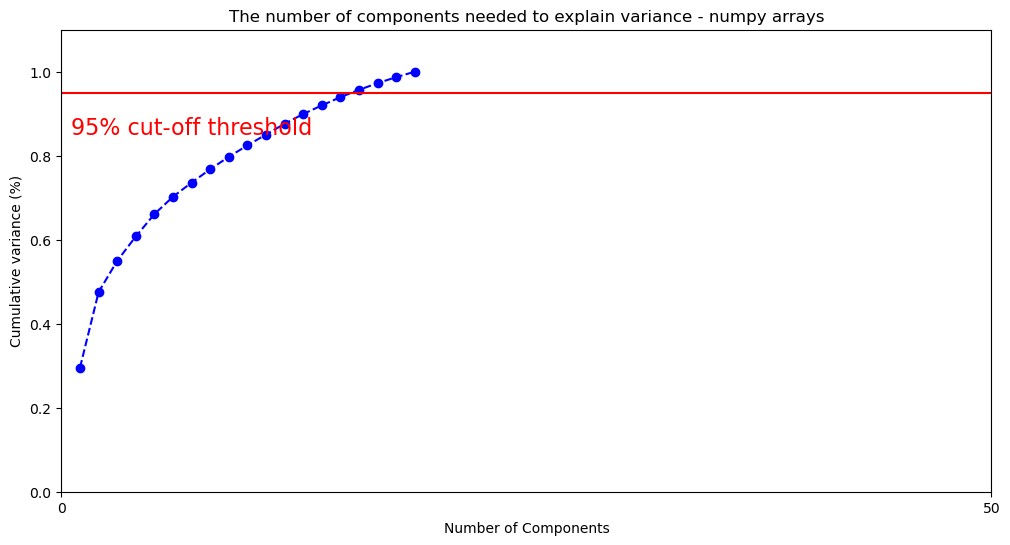

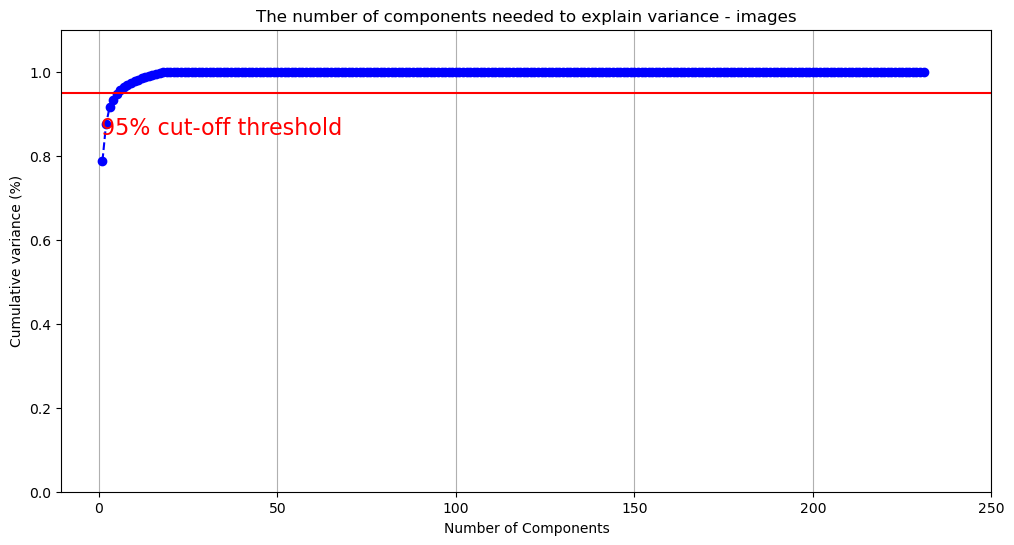

In [20]:
show_explained_variance(df_to_cluster, 'numpy arrays')
show_explained_variance(df_to_cluster_imgs, 'images')

In [21]:
def execute_pca(df, n_components=15):
    pca = PCA(n_components=n_components)
    pca.fit(df)

    explained_variance = pca.explained_variance_ratio_
    print("Sum of Explained Variance:", sum(explained_variance))
    
    pca_data = pca.transform(df)
    pca_columns = [f'PCA_{i + 1}' for i in range(n_components)]
    pca_df = pd.DataFrame(data=pca_data, columns=pca_columns)
    return pca_df

In [22]:
# arrays_pca_len = 8
# imgs_pca_len = 10

# execute_pca(df_to_cluster, arrays_pca_len)
# execute_pca(df_to_cluster_imgs, imgs_pca_len)

In [23]:
if EXECUTE_PCA:
    df_to_cluster = execute_pca(df_to_cluster, arrays_pca_len)
    df_to_cluster_imgs = execute_pca(df_to_cluster_imgs, imgs_pca_len)
    
    # dfs to visualise are the same as pca dfs
    df_to_vis = df_to_cluster
    df_to_vis_imgs = df_to_cluster_imgs
else:
    # need to execute pca to visualise dfs in 2D
    df_to_vis = execute_pca(df_to_cluster, 2)
    df_to_vis_imgs = execute_pca(df_to_cluster_imgs, 2)

Sum of Explained Variance: 0.4752553552389145
Sum of Explained Variance: 0.8746597696420013


## Estimate number of clusters

In [24]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, accuracy_score, calinski_harabasz_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.model_selection import GridSearchCV
from fcmeans import FCM
from scipy.cluster.hierarchy import dendrogram, linkage

### Elbow method

In [25]:
def elbow_method(X, max_clusters, estimator, title, estimator_params={}):
    inertia = list()
    for i in range(2, max_clusters):
        clusterer = estimator(n_clusters = i, **estimator_params)
        clusterer.fit(X)
        inertia.append(clusterer.inertia_)

    plt.plot(range(2, max_clusters), inertia, marker='o')
    plt.title(f'Elbow Method - {title}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

### Silhouette analysis

In [26]:
def plot_silhouette_diagram(X, n_clusters, cluster_labels, silhouette_avg, clusterer):
    if isinstance(X, pd.DataFrame):
        X = X.values
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for {n_clusters} clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    # Title of the entire plot
    plt.suptitle(
        f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
        fontsize=14,
        fontweight="bold",
    )

    plt.show()

def silhouette_analysis(X, max_clusters, estimator, title, estimator_params={}):
    range_n_clusters =  list(range(2, max_clusters + 1))
    scores = {}
    
    for n_clusters in range_n_clusters:
        clusterer = estimator(n_clusters=n_clusters, **estimator_params)
        if (estimator == FCM):
            clusterer.fit(X)
            cluster_labels = clusterer.predict(X)
        else:
            cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
#         print(f'For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}')
        scores[n_clusters] = silhouette_avg
        
        # TODO: PLOT THEM TO GET SOME COOL DIAGRAMS
#         plot_silhouette_diagram(X, n_clusters, cluster_labels, silhouette_avg, clusterer)
        
    plt.plot(range_n_clusters, list(scores.values()), marker='o')
    plt.title(f'Silhouette analysis - {title}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.show()
        
    return scores

def cv_silhouette_scorer(estimator, X):
    estimator.fit(X)
    cluster_labels = estimator.labels_
    num_labels = len(set(cluster_labels))
    num_samples = len(X.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return silhouette_score(X, cluster_labels)

### Davies Bouldin analysis

In [27]:
def davies_bouldin_analysis(X, max_clusters, estimator, title, estimator_params={}):
    range_n_clusters =  list(range(2, max_clusters + 1))
    scores = {}
    
    for n_clusters in range_n_clusters:
        clusterer = estimator(n_clusters=n_clusters, **estimator_params)
        if (estimator == FCM):
            estimator.fit(X)
            cluster_labels = clusterer.predict(X)
        else:
            cluster_labels = clusterer.fit_predict(X)
            
        db_score = davies_bouldin_score(X, cluster_labels)
        scores[n_clusters] = db_score

    plt.plot(range_n_clusters, list(scores.values()), marker='o')
    plt.title(f'Davies-Bouldin Index - {title}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Davies-Bouldin score')
    plt.show()

    return scores

### Estimates

In [28]:
def sort_scores(scores, reverse=True):
    return sorted(scores.items(), key=lambda x: x[1], reverse=reverse)


def print_top_n_scores(scores, n=5):
    print(f"Top {n} scores: ")
    for n, score in scores[:n]:
        print(f"{n}: {score}")
    print()

        
def get_top_n_scores(scores, n=2):     
    return [num_clusters for num_clusters, _ in scores[:n]]

        
def choose_n_clusters(top_n_scores_1, top_n_scores_2, title):
    chosen_n_clusters = list(set(top_n_scores_1) & set(top_n_scores_2))
    
    if len(chosen_n_clusters) <= 1:
        chosen_n_clusters = [top_n_scores_1[0], top_n_scores_1[1], top_n_scores_2[0], top_n_scores_2[1]]
        chosen_n_clusters = list(set(chosen_n_clusters))
    
    # add number of unique labels to chosen n clusters
    if NUMBER_UNIQUE_LABELS is not None and NUMBER_UNIQUE_LABELS not in chosen_n_clusters:
        chosen_n_clusters.append(NUMBER_UNIQUE_LABELS)

    # add clusters equal to number of emotions
    if DATASET_DIR == 'TESS' and (NUMBER_UNIQUE_LABELS // 2) not in chosen_n_clusters:
        chosen_n_clusters.append(NUMBER_UNIQUE_LABELS // 2)
        
    print(f"Chosen {title} n clusters: {chosen_n_clusters}")
    return chosen_n_clusters

    
def perform_cluster_estimations(max_clusters = NUMBER_UNIQUE_LABELS + 8):
    params = {
        'n_init': 'auto',
        'random_state': 23,
    }
    
    # -- ELBOW -- 
    print("ELBOW")
    el_a_scores = elbow_method(df_to_cluster, max_clusters, KMeans, "arrays", params)
    el_i_scores = elbow_method(df_to_cluster_imgs, max_clusters, KMeans, "imgs", params)
                  
    # -- SILHOUETTE --
    print("SILHOUETTE")
    s_a_scores = sort_scores(silhouette_analysis(df_to_cluster, max_clusters, KMeans, "arrays", params))
    print_top_n_scores(s_a_scores)

    s_i_scores = sort_scores(silhouette_analysis(df_to_cluster_imgs, max_clusters, KMeans, "imgs", params))
    print_top_n_scores(s_i_scores)
    
        
    # -- DAVIES BOULDIN --
    print("DAVIES BOULDIN")
    db_a_scores = sort_scores(davies_bouldin_analysis(df_to_cluster, max_clusters, KMeans, "arrays", params), reverse=False)
    print_top_n_scores(db_a_scores)

    db_i_scores = sort_scores(davies_bouldin_analysis(df_to_cluster_imgs, max_clusters, KMeans, "imgs", params), reverse=False)
    print_top_n_scores(db_i_scores)    
    
    chosen_n_clusters_arrays = choose_n_clusters(get_top_n_scores(s_a_scores), get_top_n_scores(db_a_scores), 'arrays')
    chosen_n_clusters_images = choose_n_clusters(get_top_n_scores(s_i_scores), get_top_n_scores(db_i_scores), 'images')
    
    return chosen_n_clusters_arrays, chosen_n_clusters_images

ELBOW


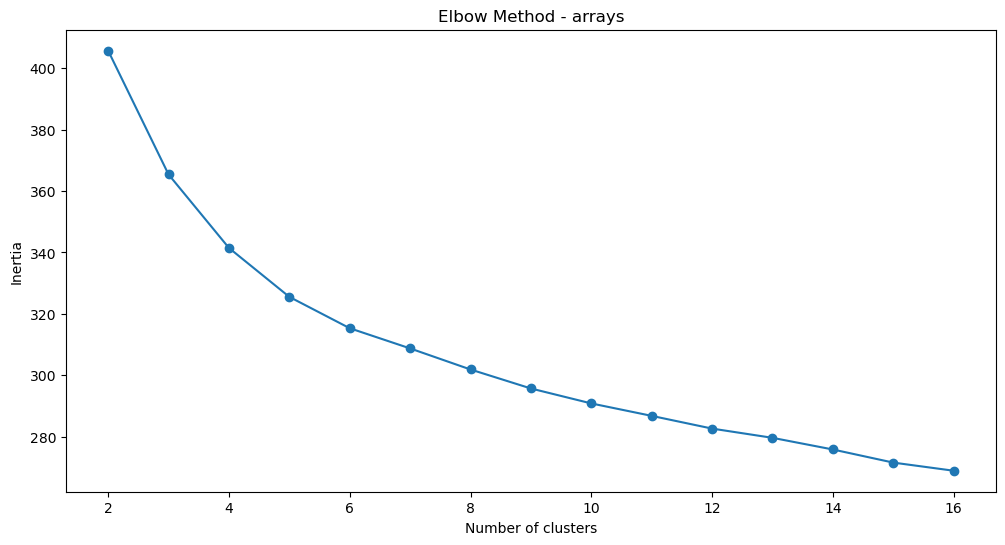

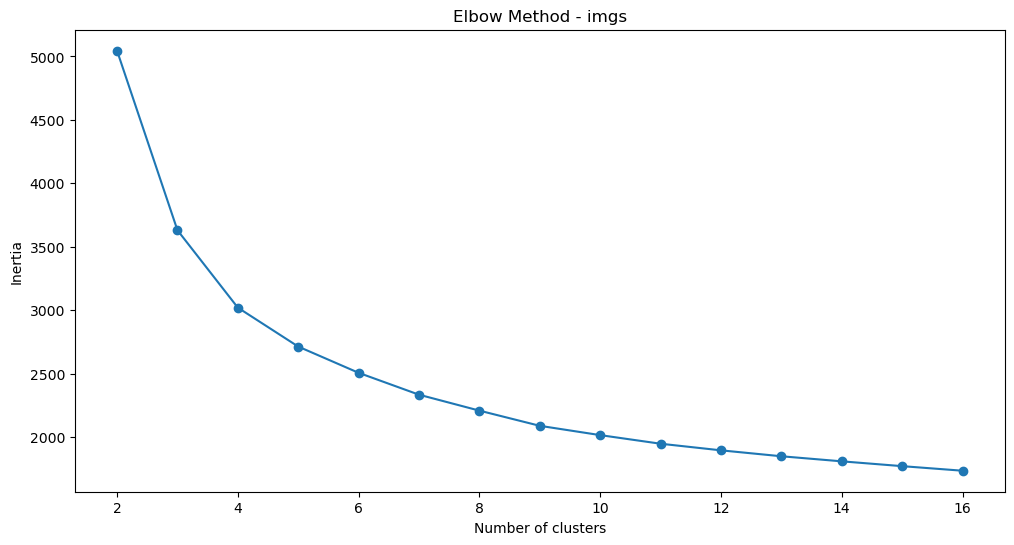

SILHOUETTE


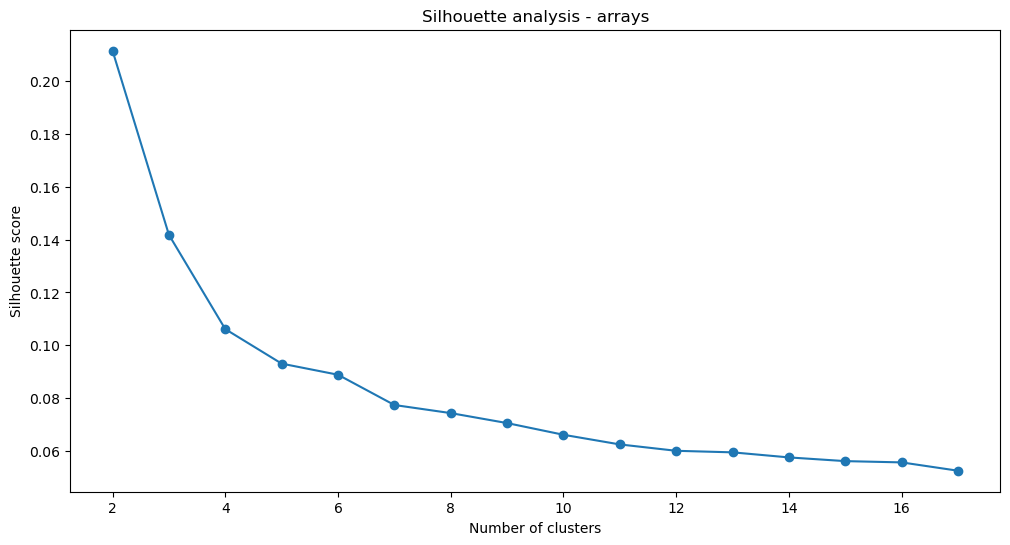

Top 5 scores: 
2: 0.211432546377182
3: 0.14180102944374084
4: 0.1061328575015068
5: 0.09307701885700226
6: 0.0888717919588089



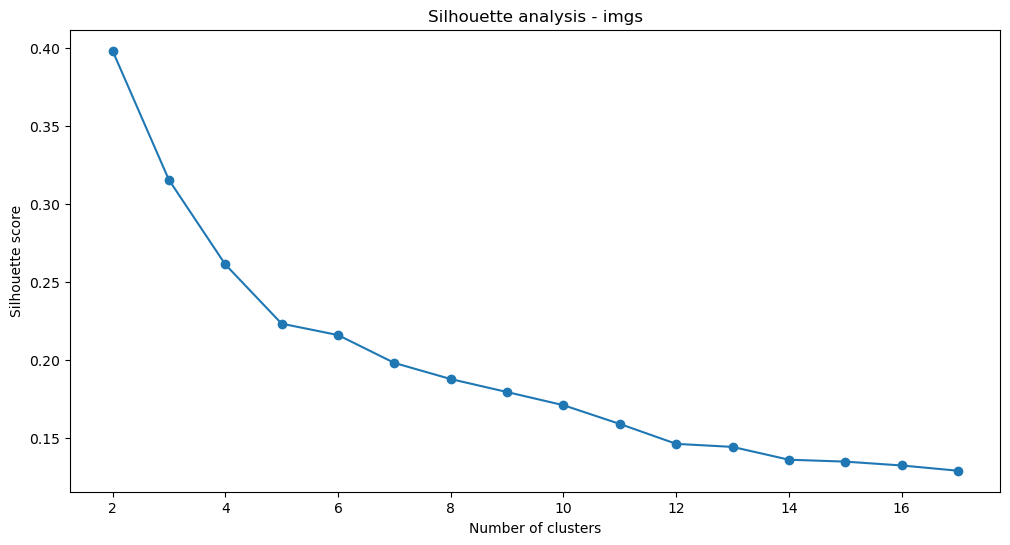

Top 5 scores: 
2: 0.3984530217028033
3: 0.31559633918272884
4: 0.2613732452966025
5: 0.2233701774133692
6: 0.21606325089081793

DAVIES BOULDIN


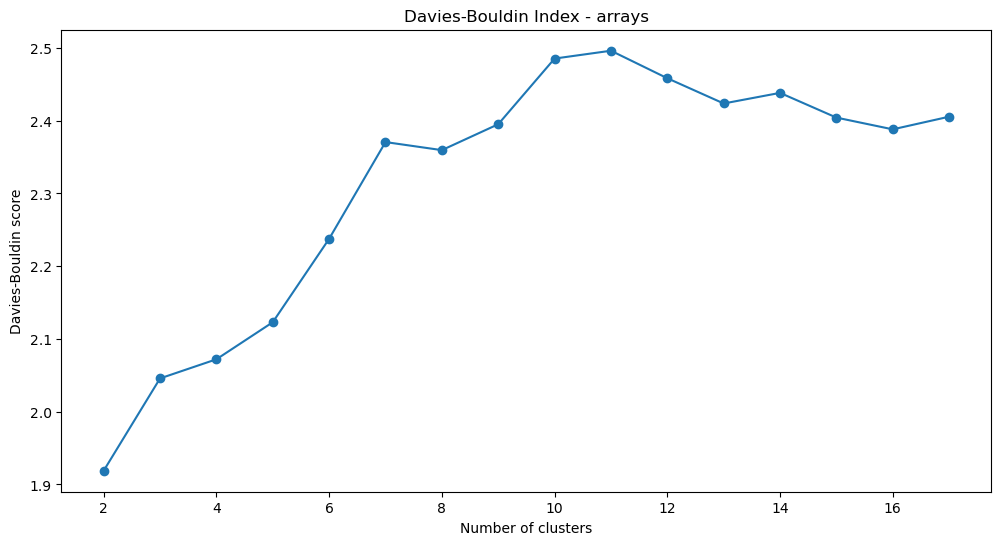

Top 5 scores: 
2: 1.9189226175278538
3: 2.045799071135078
4: 2.072075865745656
5: 2.123010123135976
6: 2.2376492659330247



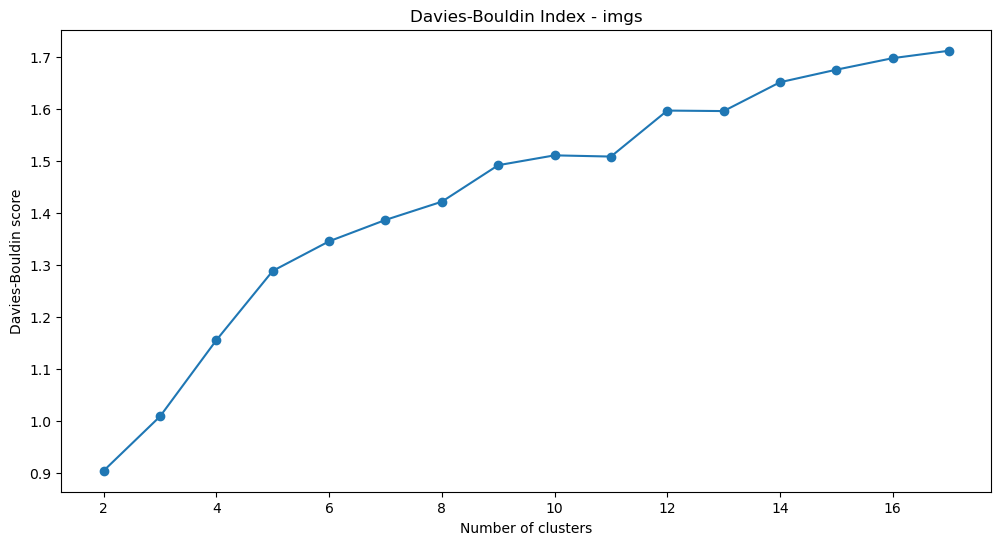

Top 5 scores: 
2: 0.9046613530738096
3: 1.0091132904546813
4: 1.1558662727855
5: 1.2890313686668105
6: 1.3459341773913136

Chosen arrays n clusters: [2, 3, 9]
Chosen images n clusters: [2, 3, 9]


In [29]:
chosen_n_clusters_arr, chosen_n_clusters_imgs = perform_cluster_estimations()

### Cluster visulisation

In [30]:
def save_plot(fig, filename, directory=os.path.join('..', 'results', DATASET_DIR, FEATURE_NAME)):
    if directory:
        os.makedirs(directory, exist_ok=True)
        filepath = os.path.join(directory, filename)
    else:
        filepath = filename
        
    fig.savefig(filepath, bbox_inches='tight')
    print(f"Plot saved as {filepath}")
    

def visualise_clusters(ax, labels, title, df, colors=None, cluster_names=None):
    pca_to_visualise_df = df[["PCA_1", "PCA_2"]]
    
    unique_labels = set(labels)
    
    if colors is None:
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels) + 1)]

    if cluster_names is not None and len(cluster_names) == len(unique_labels):
        label_mapping = dict(zip(unique_labels, cluster_names))
    else:
        label_mapping = {k: f'Cluster {k}' for k in unique_labels}
    
    for k in unique_labels:
        # for points not in any cluster
        if k == -1:
            class_member_mask = (labels == k)
            xy = pca_to_visualise_df[class_member_mask]
            ax.plot(
                xy['PCA_1'], 
                xy['PCA_2'], 
                'o', 
                markerfacecolor=(0, 0, 0, 0.1),  # Black color with high transparency
                markeredgecolor='k', 
                markeredgewidth=0.8,
                markersize=10,
                alpha=0.1,  # High transparency
                label='Noise'
            )
            continue

        class_member_mask = (labels == k)

        xy = pca_to_visualise_df[class_member_mask]
        ax.plot(
            xy['PCA_1'], 
            xy['PCA_2'], 
            'o', 
            markerfacecolor=tuple(colors[k]),
            markeredgecolor='k', 
            markeredgewidth=0.8,
            markersize=10,
            alpha=0.8,
            label=label_mapping[k]
        )

    ax.set_title(f'{title} clustering')
    ax.set_xlabel('PCA Feature 1')
    ax.set_ylabel('PCA Feature 2')
    
#     ax.set_xlim(-15, 17)
#     ax.set_ylim(-6, 6)
    
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

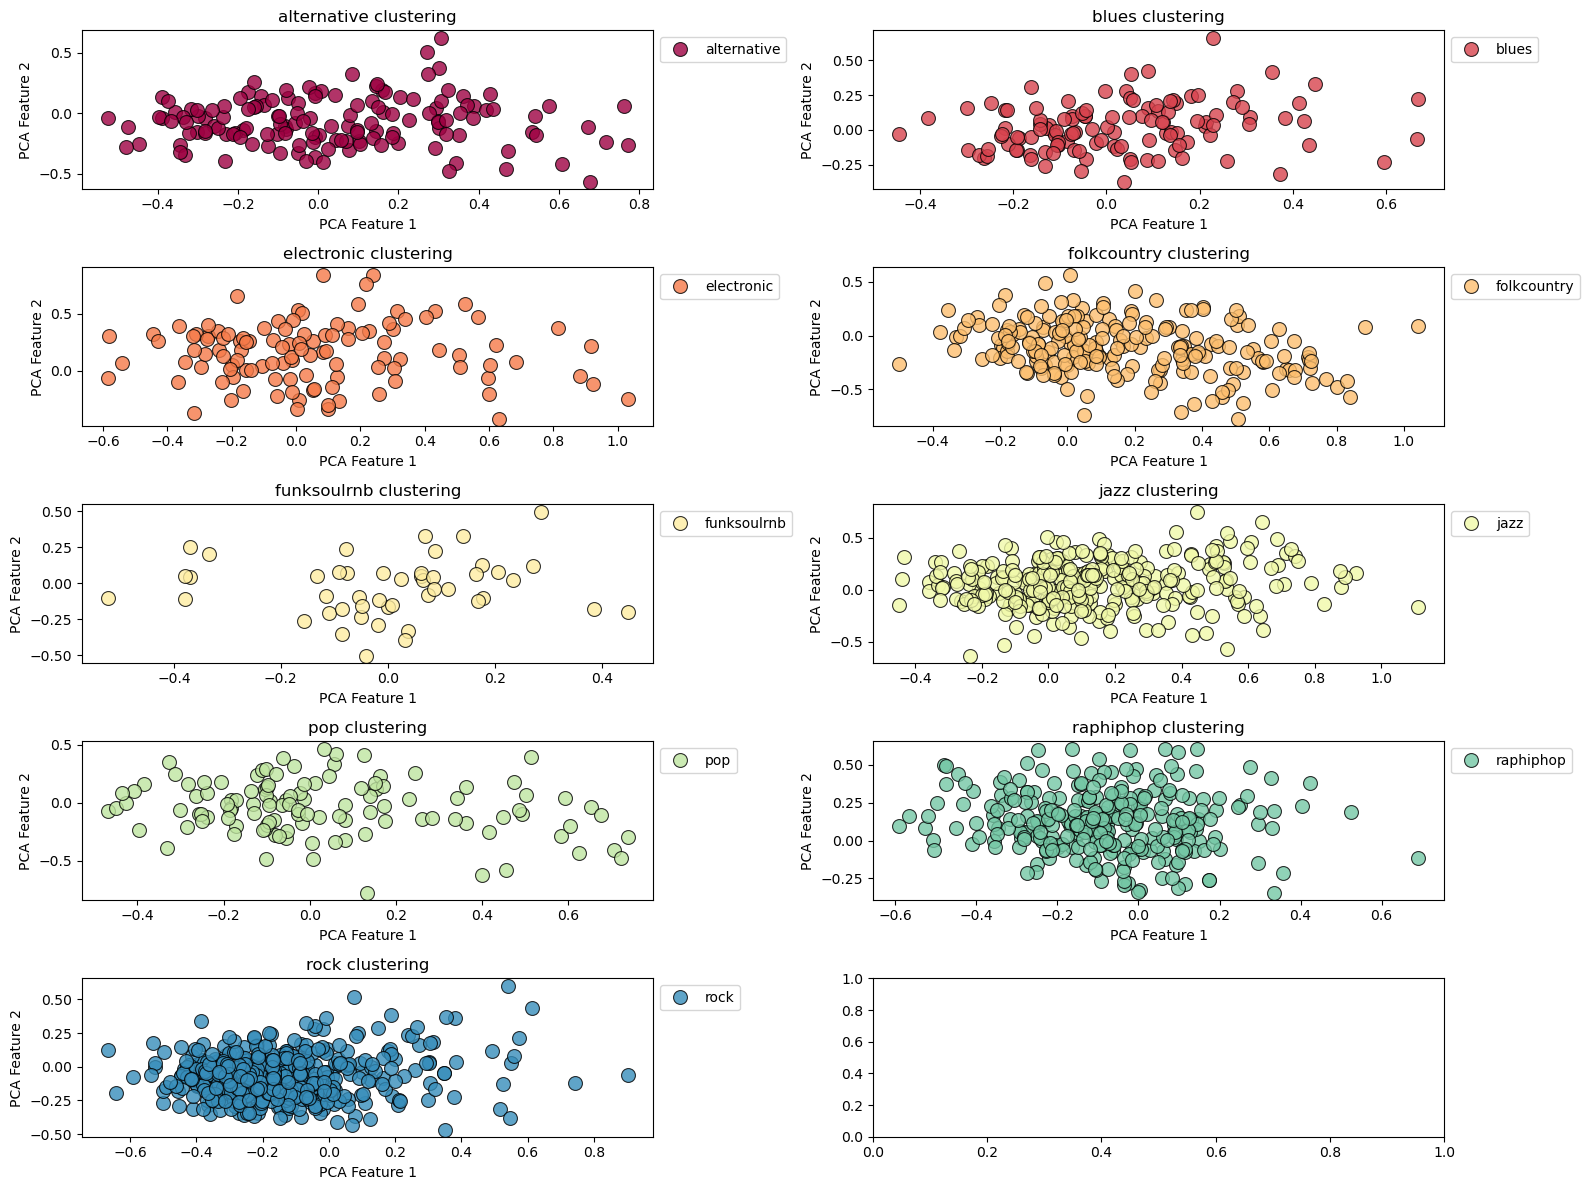

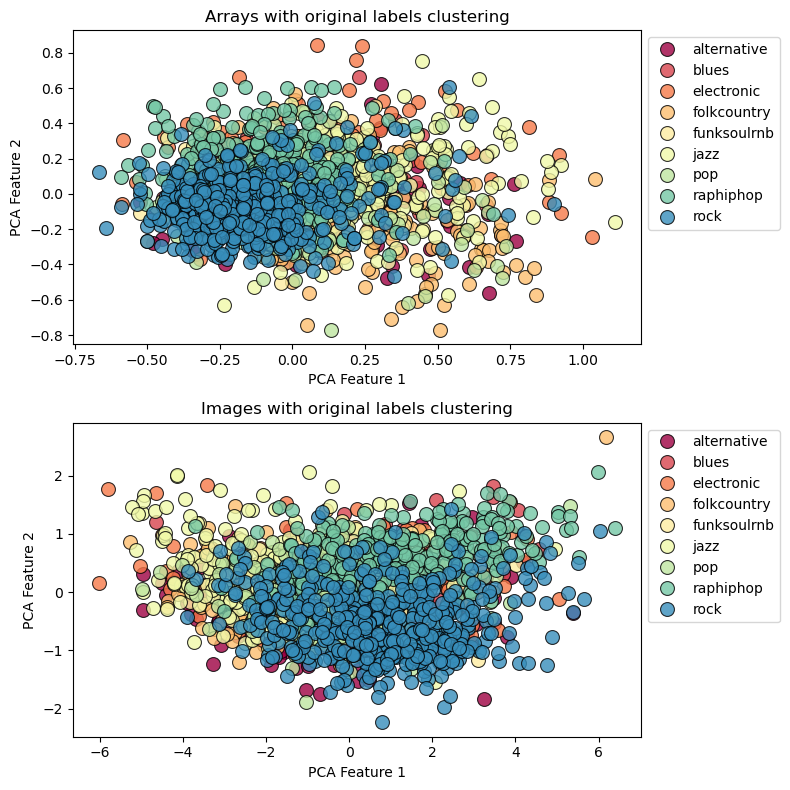

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\all-data-pca-False.png


In [31]:
unique_labels = set(ORIGINAL_LABELS)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels) + 1)]
color_mapping = {label: colors[i] for i, label in enumerate(unique_labels)}

# check if column named label exist in df
if 'label' in df.columns:
    fig, axes = plt.subplots((NUMBER_UNIQUE_LABELS // 2) + 1, 2, figsize=(16, 12))

    for n, cluster_name in enumerate(CLUSTER_NAMES):
        row_idx = n // 2
        col_idx = n % 2
        
        cluster_mask = (df['label'] == cluster_name)
        cluster_labels = ORIGINAL_LABELS[cluster_mask]
        cluster_df = df_to_vis[cluster_mask]
        visualise_clusters(axes[row_idx, col_idx], cluster_labels, cluster_name, cluster_df, colors=colors, cluster_names=[cluster_name])
    
    fig.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(2, 1, figsize=(8, 8))
    
    visualise_clusters(axes[0], ORIGINAL_LABELS, 'Arrays with original labels', df_to_vis, cluster_names=CLUSTER_NAMES)
    visualise_clusters(axes[1], ORIGINAL_LABELS, 'Images with original labels', df_to_vis_imgs, cluster_names=CLUSTER_NAMES)
    
    fig.tight_layout()
    plt.show()
    
    save_plot(fig, f"all-data-pca-{EXECUTE_PCA}.png")
    

### DBSCAN

In [32]:
def perform_dbscan(
    df,
    df_to_vis,
    title='DBSCAN', 
    param_grid={
        'algorithm': ['auto', 'brute'],
        'eps': [0.25, 1, 2, 5],
        'leaf_size': [5, 10, 30],
        'min_samples': [3, 5, 15]
    }):
    dbscan = DBSCAN()
    
    # Find best params
    print("Searching for best params...")
    grid_search = GridSearchCV(
        estimator=dbscan, 
        param_grid=param_grid, 
        cv=[(slice(None), slice(None))],
        scoring=cv_silhouette_scorer,
        n_jobs=-1
    ).fit(df)

    best_params = grid_search.best_params_
    print("Best parameters found:", best_params)
    print("Best score:", grid_search.best_score_)

    # Perform clustering
    dbscan = DBSCAN(
        eps=1.0,
        min_samples=best_params['min_samples'],
        algorithm=best_params['algorithm'],
        leaf_size=best_params['leaf_size']
    ).fit(df)

    labels = dbscan.labels_
    num_dbscan_labels = len(set(labels))
    print(f"dbscan cluster data into {num_dbscan_labels} clusters")
    
    # Visualise results
    fig, axes = plt.subplots(1, 1, figsize=(8, 4))
    visualise_clusters(axes, labels, title, df_to_vis)
    fig.tight_layout()
    plt.show()
    
    save_plot(fig, f"{title}-pca-{EXECUTE_PCA}.png")
    
    return labels, num_dbscan_labels

Searching for best params...
Best parameters found: {'algorithm': 'auto', 'eps': 1, 'leaf_size': 5, 'min_samples': 3}
Best score: 0.5313951969146729
dbscan cluster data into 2 clusters


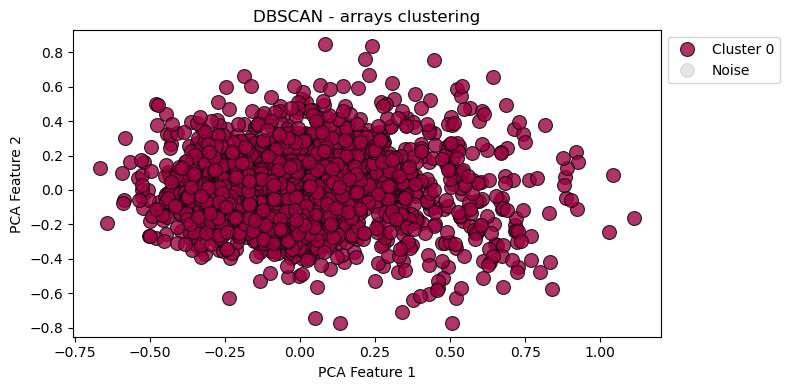

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\DBSCAN - arrays-pca-False.png
Searching for best params...
Best parameters found: {'algorithm': 'auto', 'eps': 2, 'leaf_size': 5, 'min_samples': 3}
Best score: 0.5183464627039014
dbscan cluster data into 3 clusters


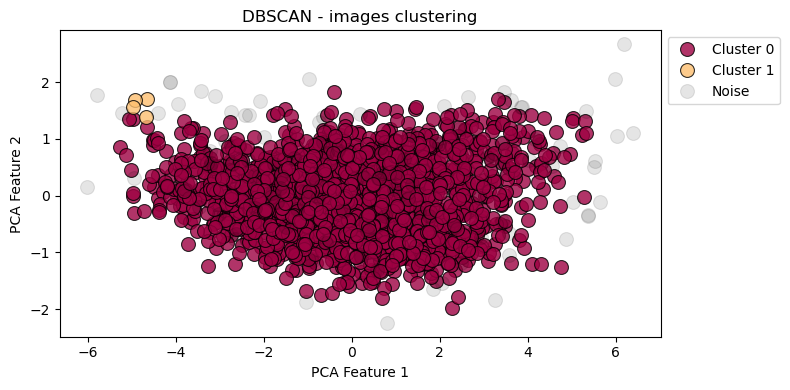

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\DBSCAN - images-pca-False.png


In [33]:
labels_dbscan_arr, dbscan_num_labels_arr = perform_dbscan(df_to_cluster, df_to_vis, 'DBSCAN - arrays')
labels_dbscan_img, dbscan_num_labels_imgs = perform_dbscan(df_to_cluster_imgs, df_to_vis_imgs, 'DBSCAN - images')

## KMeans

In [34]:
def perform_grid_search(estimator, df, chosen_n_clusters, param_grid, estimator_params={}):
    grid_search_scores = {}
    
    for n_clusters in chosen_n_clusters:
        print(f"Searching for best params for {n_clusters} clusters...")

        clusterer = estimator(**estimator_params, n_clusters=n_clusters)

        grid_search = GridSearchCV(
            estimator=clusterer, 
            param_grid=param_grid, 
            cv=[(slice(None), slice(None))],
            scoring=cv_silhouette_scorer,
            n_jobs=-1
        )
        grid_search.fit(df)

        grid_search_scores[n_clusters] = {
            "best_params": grid_search.best_params_,
            "best_score": grid_search.best_score_
        }
    
    return grid_search_scores

In [35]:
def perform_k_means(df, df_to_vis, chosen_n_clusters, title=''):
    # Find best params for each n clusters
    estimator_params = {'n_init': 'auto', 'random_state': 23}
    param_grid = {
        'init': ['k-means++', 'random'],
        'max_iter': [10, 15, 25, 50, 100, 200],
        'tol': [1e-2, 1e-3, 1e-4, 1e-5]
    }
    grid_search_scores = perform_grid_search(
        KMeans, df, chosen_n_clusters, param_grid, estimator_params
    )
    
    # Perform clustering for each n clusters
    all_labels = {}
    for n in grid_search_scores:
        grid_search = grid_search_scores[n]
        print(f"Best params for {n} clusters: {grid_search['best_params']}")
        print(f"Best score {grid_search['best_score']}")
        
        print(f"Performing clustering for {n} clusters")
        kmeans = KMeans(
            random_state=23, 
            n_init='auto',
            n_clusters=n,
            init=grid_search['best_params']['init'],
            max_iter=grid_search['best_params']['max_iter'],
            tol=grid_search['best_params']['tol']
        ).fit(df)
        
        all_labels[n] = kmeans.labels_
        
        # Visualise results
        fig, axes = plt.subplots(1, 1, figsize=(8, 4))
        visualise_clusters(axes, kmeans.labels_, f'KMeans {n} clusters - {title}', df_to_vis)
        fig.tight_layout()
        plt.show()
        
        save_plot(fig, f"KMeans-{title}-{n}-clusters-pca-{EXECUTE_PCA}.png")
        
    return all_labels

Searching for best params for 2 clusters...
Searching for best params for 3 clusters...
Searching for best params for 9 clusters...
Best params for 2 clusters: {'init': 'random', 'max_iter': 10, 'tol': 0.001}
Best score 0.21211031079292297
Performing clustering for 2 clusters


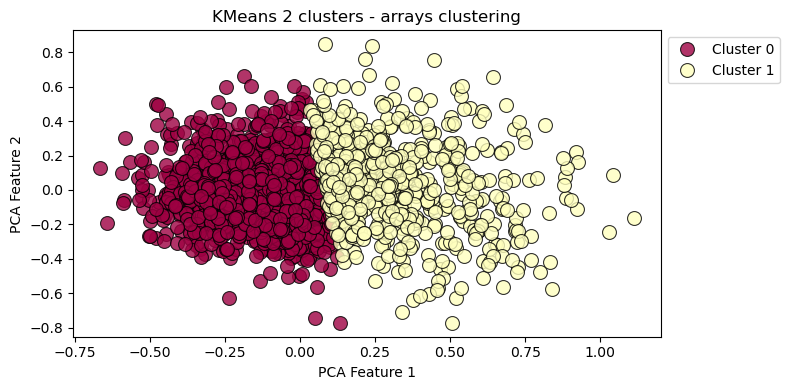

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\KMeans-arrays-2-clusters-pca-False.png
Best params for 3 clusters: {'init': 'k-means++', 'max_iter': 10, 'tol': 0.01}
Best score 0.1608058214187622
Performing clustering for 3 clusters


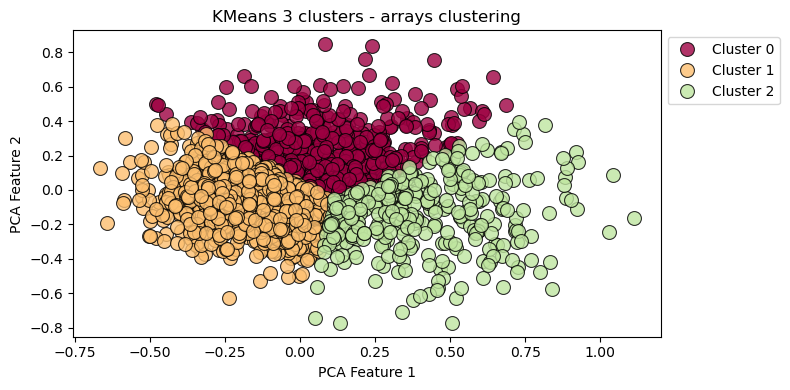

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\KMeans-arrays-3-clusters-pca-False.png
Best params for 9 clusters: {'init': 'random', 'max_iter': 25, 'tol': 0.001}
Best score 0.07318294793367386
Performing clustering for 9 clusters


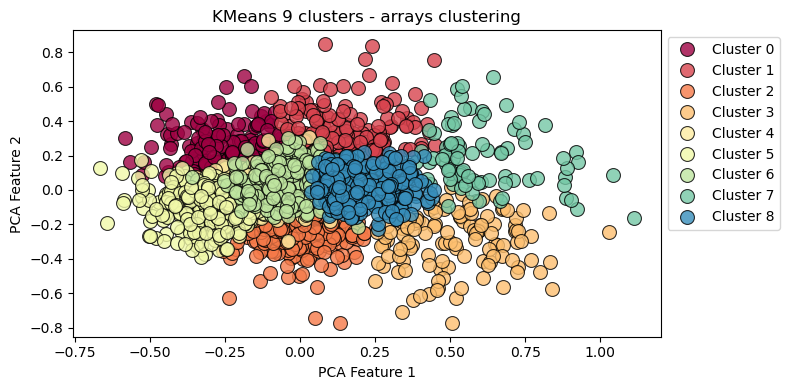

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\KMeans-arrays-9-clusters-pca-False.png
Searching for best params for 2 clusters...
Searching for best params for 3 clusters...
Searching for best params for 9 clusters...
Best params for 2 clusters: {'init': 'k-means++', 'max_iter': 10, 'tol': 0.01}
Best score 0.3984603089535878
Performing clustering for 2 clusters


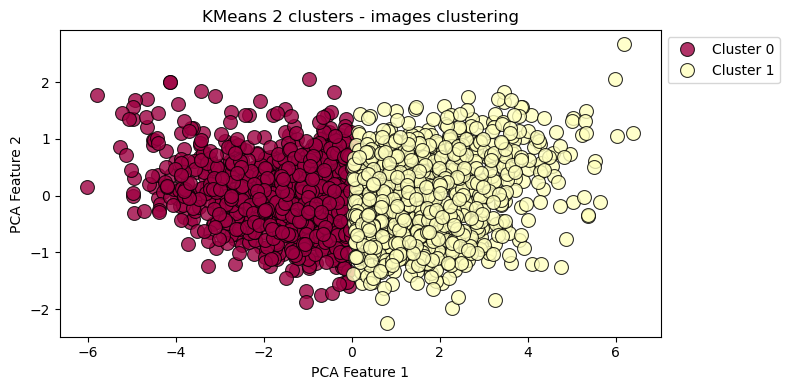

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\KMeans-images-2-clusters-pca-False.png
Best params for 3 clusters: {'init': 'k-means++', 'max_iter': 15, 'tol': 0.01}
Best score 0.31559633918272884
Performing clustering for 3 clusters


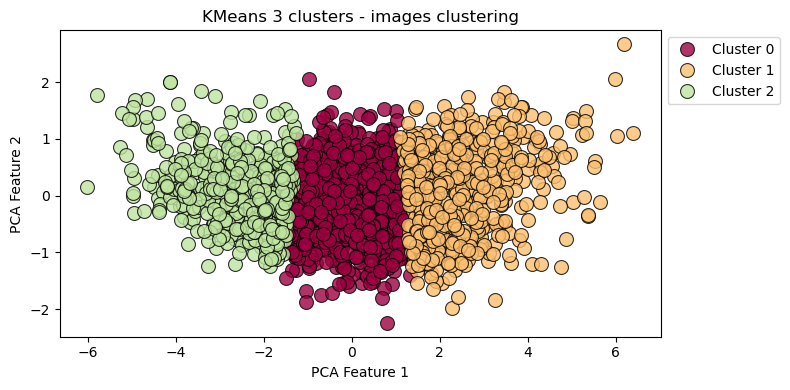

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\KMeans-images-3-clusters-pca-False.png
Best params for 9 clusters: {'init': 'k-means++', 'max_iter': 25, 'tol': 0.01}
Best score 0.17995158966182764
Performing clustering for 9 clusters


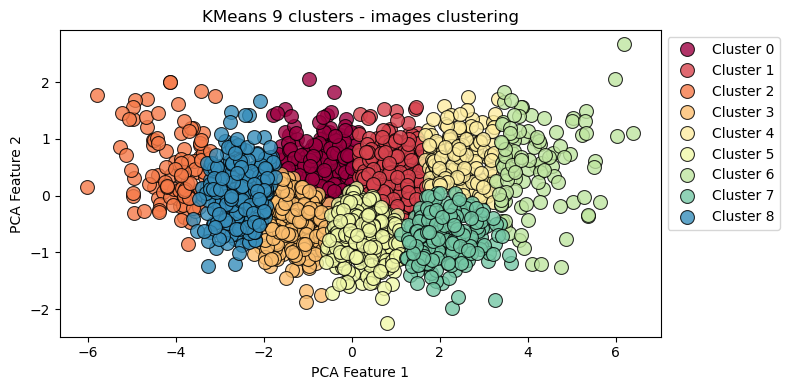

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\KMeans-images-9-clusters-pca-False.png


In [36]:
all_labels_kmeans_arr = perform_k_means(df_to_cluster, df_to_vis, chosen_n_clusters_arr, title='arrays')
all_labels_kmeans_img = perform_k_means(df_to_cluster_imgs, df_to_vis_imgs, chosen_n_clusters_imgs, title='images')

### Agglomerative Clustering

In [37]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                # Leaf node
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [38]:
def perform_agglomerative(df, df_to_vis, chosen_n_clusters, title):
    # Plot dendrogram
    agglo = AgglomerativeClustering(
                n_clusters=None,
                compute_distances=True,
                distance_threshold=0
            ).fit(df)
    plt.title(f'Hierarchical Clustering Dendrogram - {title}')
    # Plot the top three levels of the dendrogram
    plot_dendrogram(agglo, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    
    # Find best params for each n clusters
    param_grid = {'linkage': ['ward', 'complete', 'average', 'single']}
    grid_search_scores = perform_grid_search(AgglomerativeClustering, df, chosen_n_clusters, param_grid)

    # Perform clustering for each n clusters
    all_labels = {}
    for n in grid_search_scores:
        grid_search = grid_search_scores[n]
        print(f"Best params for {n} clusters: {grid_search['best_params']}")
        print(f"Best score {grid_search['best_score']}")
        
        print(f"Performing clustering for {n} clusters")
        agglo = AgglomerativeClustering(
            n_clusters=n,
            compute_distances=True,
            linkage=grid_search['best_params']['linkage']
        ).fit(df)

        all_labels[n] = agglo.labels_
        
        # Visualise results
        fig, axes = plt.subplots(1, 1, figsize=(8, 4))
        visualise_clusters(axes, agglo.labels_, f'Agglomerative {n} clusters - {title}', df_to_vis)
        fig.tight_layout()
        plt.show()
        
        save_plot(fig, f"Agg-{title}-{n}-clusters-pca-{EXECUTE_PCA}.png")
        
        
    return all_labels

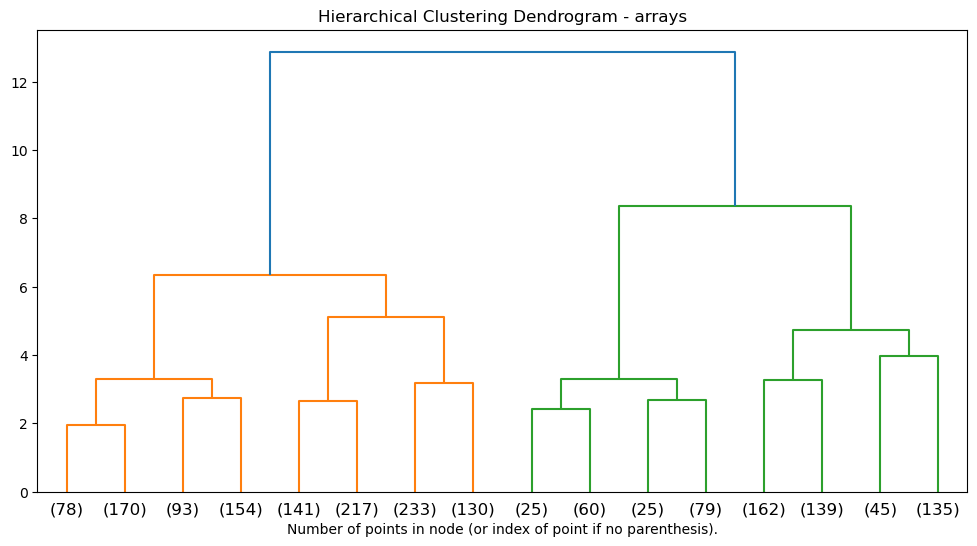

Searching for best params for 2 clusters...
Searching for best params for 3 clusters...
Searching for best params for 9 clusters...
Best params for 2 clusters: {'linkage': 'average'}
Best score 0.5313951969146729
Performing clustering for 2 clusters


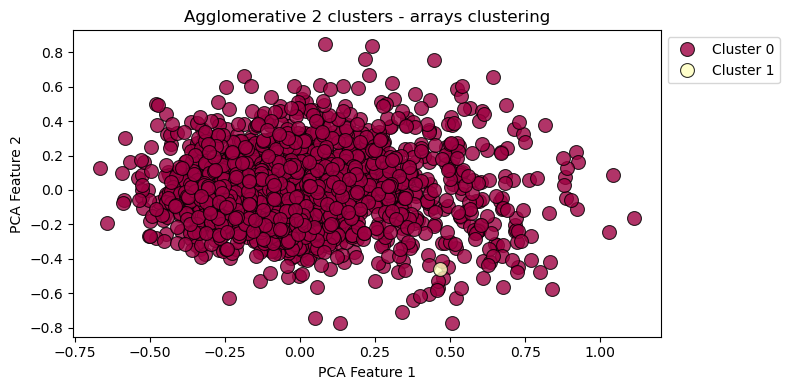

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\Agg-arrays-2-clusters-pca-False.png
Best params for 3 clusters: {'linkage': 'average'}
Best score 0.5062440037727356
Performing clustering for 3 clusters


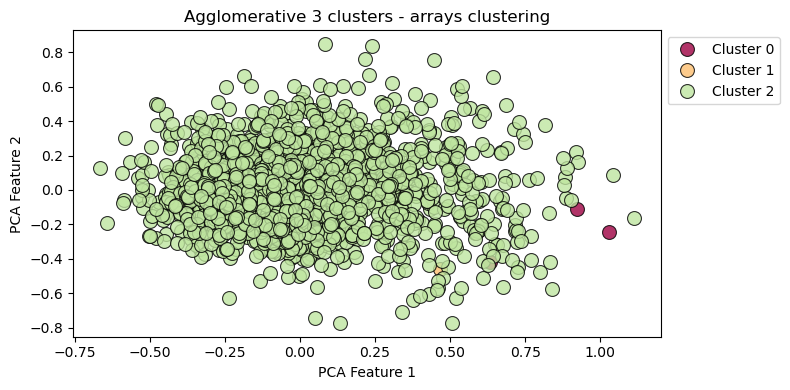

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\Agg-arrays-3-clusters-pca-False.png
Best params for 9 clusters: {'linkage': 'single'}
Best score 0.3458002805709839
Performing clustering for 9 clusters


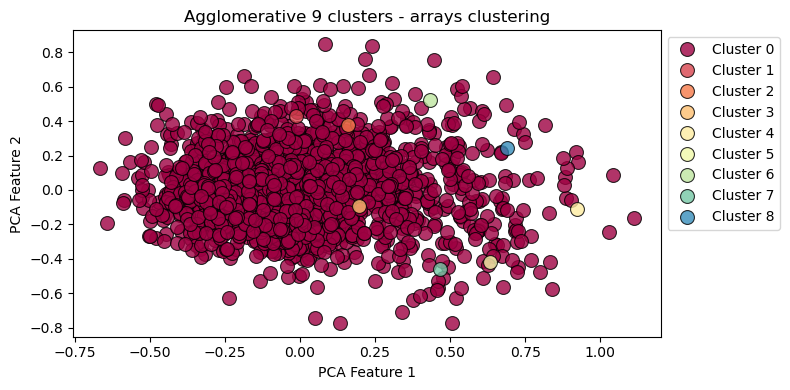

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\Agg-arrays-9-clusters-pca-False.png


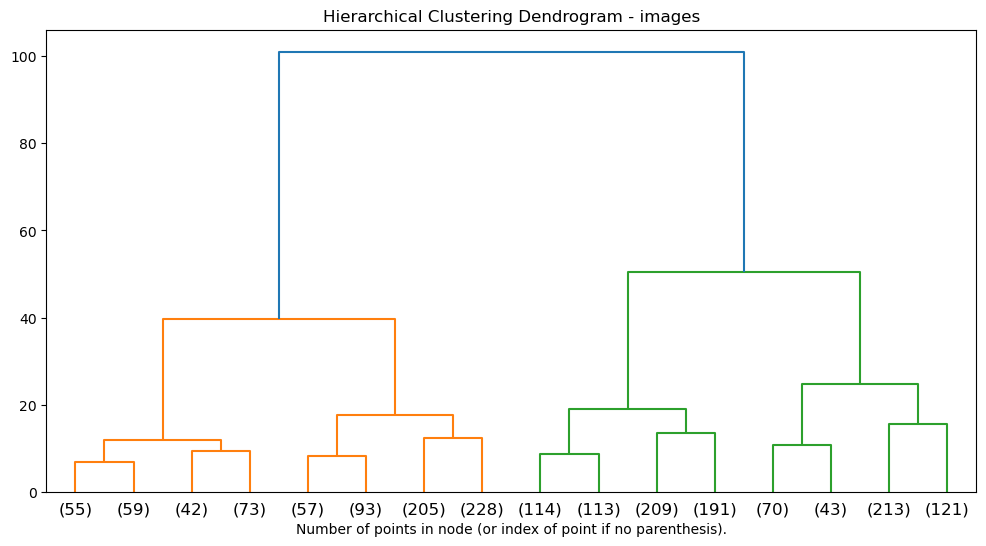

Searching for best params for 2 clusters...
Searching for best params for 3 clusters...
Searching for best params for 9 clusters...
Best params for 2 clusters: {'linkage': 'average'}
Best score 0.5183464627039014
Performing clustering for 2 clusters


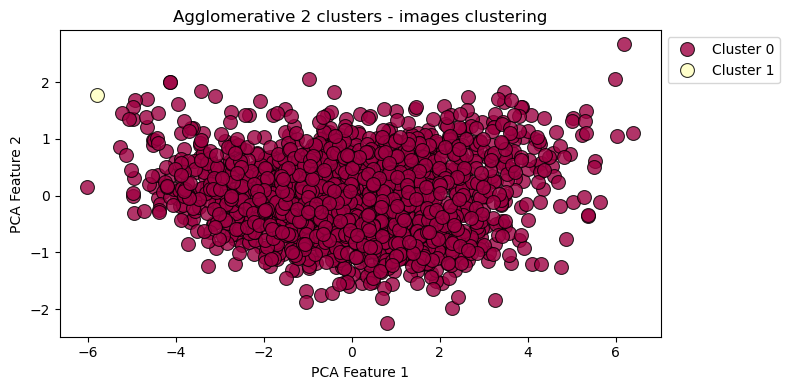

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\Agg-images-2-clusters-pca-False.png
Best params for 3 clusters: {'linkage': 'average'}
Best score 0.32848485590153426
Performing clustering for 3 clusters


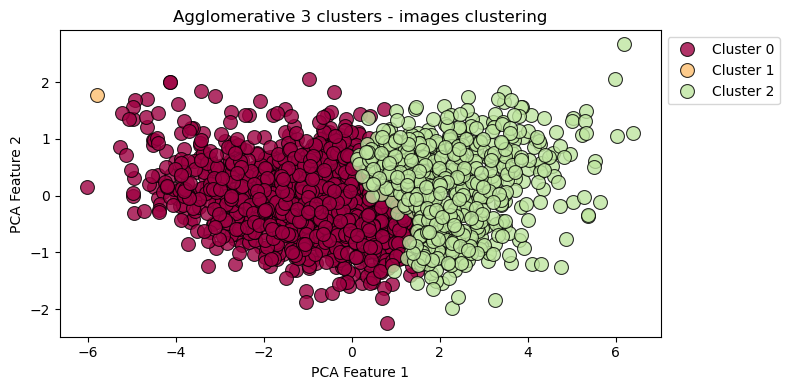

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\Agg-images-3-clusters-pca-False.png
Best params for 9 clusters: {'linkage': 'average'}
Best score 0.2053043468673331
Performing clustering for 9 clusters


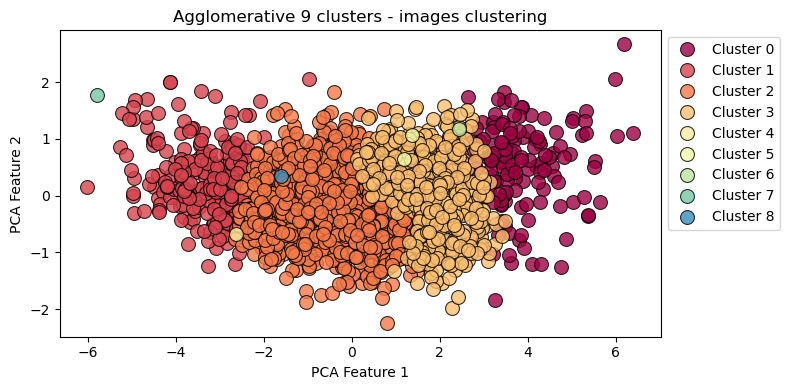

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\Agg-images-9-clusters-pca-False.png


In [39]:
all_labels_aggl_arr = perform_agglomerative(df_to_cluster, df_to_vis, chosen_n_clusters_arr, 'arrays')
all_labels_aggl_img = perform_agglomerative(df_to_cluster_imgs, df_to_vis_imgs, chosen_n_clusters_imgs, 'images')

### Fuzzy c-means

In [40]:
def fcm_grid_search(param_grid, n_clusters, df, estimator_params={}):
    best_params = None
    best_score = -np.inf
#     best_labels = None
#     best_centers = None
    
    print(f"Searching for best params for {n_clusters} clusters...")
    
    # Iterate over all parameter combinations
    for max_iter in param_grid['max_iter']:
        for m in param_grid['m']:
            for error in param_grid['error']:
                try:
                    # Perform FCM clustering
                    fcm = FCM(n_clusters=n_clusters, max_iter=max_iter, m=m, error=error, **estimator_params)
                    fcm.fit(df.values)
                    cluster_labels = fcm.predict(df.values)
                    cluster_centers = fcm.centers

                    # Evaluate clustering performance using silhouette score
                    silhouette_avg = silhouette_score(df, cluster_labels)
#                     print(f"max_iter: {max_iter}, m: {m}, error: {error}, silhouette_score: {silhouette_avg}")

                    if silhouette_avg > best_score:
                        best_score = silhouette_avg
                        best_params = {'max_iter': max_iter, 'm': m, 'error': error}
#                         best_labels = cluster_labels
#                         best_centers = cluster_centers
                    
                except (ZeroDivisionError, ValueError, FloatingPointError) as e:
                    print(f"Skipping parameters max_iter: {max_iter}, m: {m}, error: {error} due to error: {e}")

    grid_search_results = {"best_params": best_params, "best_score": best_score}
    return grid_search_results

In [41]:
def perform_c_means(df, df_to_vis, chosen_n_clusters, title):
    # Find best params for each n clusters
    param_grid = {
        'max_iter': [50, 100],
        'm': [1.1, 1.5, 2],
        'error': [1e-2, 1e-3]
    }
    grid_search_scores = {}
    for n_clusters in chosen_n_clusters:
        grid_search_scores[n_clusters] = fcm_grid_search(
            param_grid, 
            n_clusters, 
            df, 
            estimator_params={'random_state': 23}
        )
        
    # Perform clustering for each n clusters
    all_labels = {}
    for n in grid_search_scores:
        grid_search = grid_search_scores[n]
        print(f"Best params for {n} clusters: {grid_search['best_params']}")
        print(f"Best score {grid_search['best_score']}")
        
        print(f"Performing clustering for {n} clusters")
        cmeans = FCM(
            random_state=23, 
            n_clusters=n,
            max_iter=grid_search['best_params']['max_iter'],
            m=grid_search['best_params']['m'],
            error=grid_search['best_params']['error']
        )
        cmeans.fit(df.values)

        labels = cmeans.predict(df.values)
        all_labels[n] = labels
        
        pc = f"{cmeans.partition_coefficient:.3f}"
        pec = f"{cmeans.partition_entropy_coefficient:.3f}"

        # Visualise results
        fig, axes = plt.subplots(1, 1, figsize=(8, 4))
        visualise_clusters(axes, labels, f'PC: {pc}, PEC: {pec}. Fuzzy c-means {n} clusters - {title}', df_to_vis)
        fig.tight_layout()
        plt.show()
        
        save_plot(fig, f"FCM-{title}-{n}-clusters-pca-{EXECUTE_PCA}.png")
        
    return all_labels

Searching for best params for 2 clusters...
Searching for best params for 3 clusters...
Searching for best params for 9 clusters...
Best params for 2 clusters: {'max_iter': 50, 'm': 1.1, 'error': 0.01}
Best score 0.20927244424819946
Performing clustering for 2 clusters


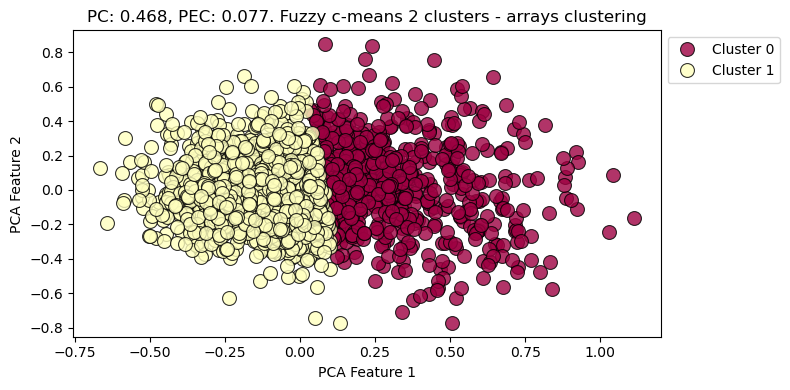

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\FCM-arrays-2-clusters-pca-False.png
Best params for 3 clusters: {'max_iter': 100, 'm': 1.1, 'error': 0.001}
Best score 0.14242573082447052
Performing clustering for 3 clusters


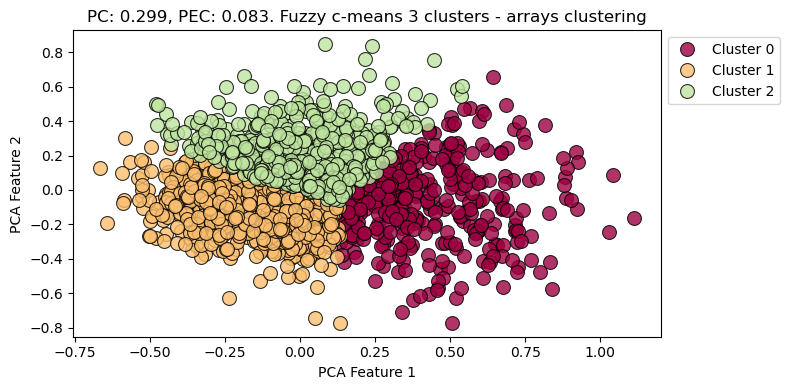

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\FCM-arrays-3-clusters-pca-False.png
Best params for 9 clusters: {'max_iter': 100, 'm': 1.1, 'error': 0.001}
Best score 0.07300195097923279
Performing clustering for 9 clusters


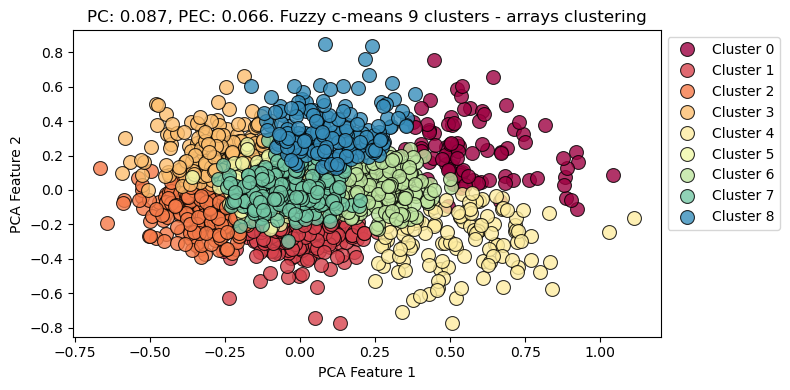

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\FCM-arrays-9-clusters-pca-False.png
Searching for best params for 2 clusters...
Searching for best params for 3 clusters...
Searching for best params for 9 clusters...
Best params for 2 clusters: {'max_iter': 50, 'm': 2, 'error': 0.01}
Best score 0.39843880509188084
Performing clustering for 2 clusters


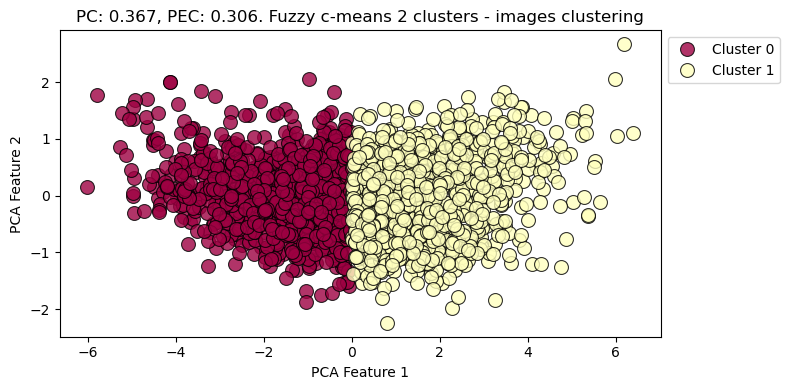

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\FCM-images-2-clusters-pca-False.png
Best params for 3 clusters: {'max_iter': 50, 'm': 1.1, 'error': 0.01}
Best score 0.31472688496196943
Performing clustering for 3 clusters


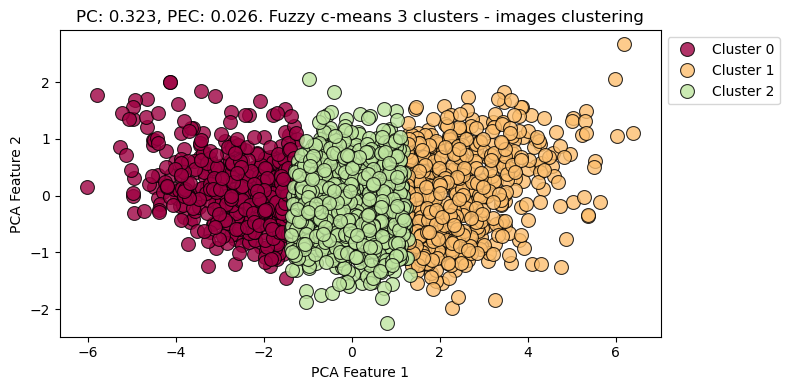

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\FCM-images-3-clusters-pca-False.png
Best params for 9 clusters: {'max_iter': 100, 'm': 1.1, 'error': 0.01}
Best score 0.17872397940843182
Performing clustering for 9 clusters


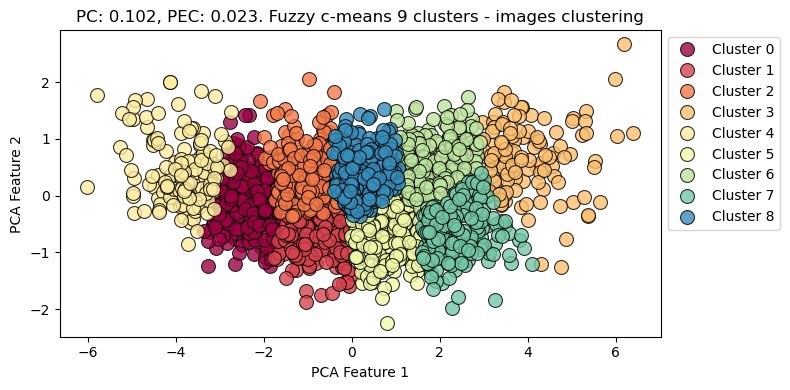

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\FCM-images-9-clusters-pca-False.png


In [42]:
all_labels_cmeans_arr = perform_c_means(df_to_cluster, df_to_vis, chosen_n_clusters_arr, 'arrays')
all_labels_cmeans_img = perform_c_means(df_to_cluster_imgs, df_to_vis_imgs, chosen_n_clusters_imgs, 'images')

### Results

In [43]:
from scipy.optimize import linear_sum_assignment
from scipy.stats import mode

In [44]:
def compute_cluster_purity(true_labels, predicted_labels, num_true_clusters, num_predicted_clusters):
    purity_matrix = np.zeros((num_true_clusters, num_predicted_clusters))

    for i in range(num_predicted_clusters):
        cluster_indices = np.where(predicted_labels == i)[0]
        
        # Skip if there is no data points in cluster i
        if len(cluster_indices) == 0:
            continue
        
        cluster_true_labels = true_labels[cluster_indices]
        unique_true_labels, counts = np.unique(cluster_true_labels, return_counts=True)
        most_frequent_true_label = unique_true_labels[np.argmax(counts)]
        purity_matrix[most_frequent_true_label, i] = counts.max() / len(cluster_indices)

    return purity_matrix


def assign_clusters(true_labels, predicted_labels, num_true_clusters, num_predicted_clusters):
    purity_matrix = compute_cluster_purity(true_labels, predicted_labels, num_true_clusters, num_predicted_clusters)
    row_ind, col_ind = linear_sum_assignment(-purity_matrix)  # maximize the sum of purities

    cluster_mapping = {}
    for i, j in zip(row_ind, col_ind):
        cluster_mapping[j] = i

    return cluster_mapping


def map_clusters(predicted_labels, cluster_mapping):
    mapped_labels = np.zeros(len(predicted_labels))
    for predicted_cluster, true_cluster in cluster_mapping.items():
        mapped_labels[predicted_labels == predicted_cluster] = true_cluster
    return mapped_labels.astype(int)

In [45]:
def calculate_nmif(output_labels, original_labels):
    return normalized_mutual_info_score(output_labels, original_labels)

def calculate_acc(output_labels, original_labels):
    cluster_mapping = assign_clusters(original_labels, output_labels, NUMBER_UNIQUE_LABELS, NUMBER_UNIQUE_LABELS)
    mapped_labels = map_clusters(output_labels, cluster_mapping)
    
    return accuracy_score(original_labels, mapped_labels)

def calculate_sil(output_labels, X):
    return silhouette_score(X, output_labels)

def calculate_chs(output_labels, X):
    return calinski_harabasz_score(X, output_labels)

def calculate_dbi(output_labels, X):
    return davies_bouldin_score(X, output_labels)

def calculate_scores(output_labels, original_labels, X, num_clusters, number_unique_labels):
    scores = {}
    
    # If 1 or less clusters -> dont calcualte scores
    if num_clusters <= 1:
        return scores
    
    # if number of clusters is the same as in original df check additional scores 
    if num_clusters == number_unique_labels:
        scores['Normalized Mutual Info'] = calculate_nmif(output_labels, original_labels)
        scores['Accuracy'] = calculate_acc(output_labels, original_labels)

    scores['Silhouette'] = calculate_sil(output_labels, X)
    scores['Calinski-Harabasz'] = calculate_chs(output_labels, X)
    scores['Davies-Bouldin'] = calculate_dbi(output_labels, X)
    
    return scores

def get_scores(label_dicts, df, data, chosen_n_clusters):
    results = []
    scores = {}
    
    for n in chosen_n_clusters:
        for method, labels in label_dicts.items():
            scores = calculate_scores(labels[n], ORIGINAL_LABELS, df, n, NUMBER_UNIQUE_LABELS)
            
            scores['Num_Clusters'] = n
            scores['Method'] = method
            scores['Data'] = data
            
            results.append(scores)
            
    return results
    
def get_dbscan_scores(labels, df, num_clusters, data):
    scores = {}
    
    scores = calculate_scores(labels, ORIGINAL_LABELS, df, num_clusters, NUMBER_UNIQUE_LABELS)
    
    scores['Num_Clusters'] = num_clusters
    scores['Method'] = 'DBSCAN'
    scores['Data'] = data
            
    return scores

def get_all_scores(dbscan_data, label_dicts_arr, label_dicts_img, df_arr, df_img):
    results = []
    
    # Arrays
    results.append(get_dbscan_scores(
        dbscan_data['ARRAYS']['LABELS'], 
        df_arr, 
        dbscan_data['ARRAYS']['NUM_LABELS'], 
        'Arrays'
    ))
    results.extend(get_scores(label_dicts_arr, df_arr, 'Arrays', chosen_n_clusters_arr))
    
    # Images
    results.append(get_dbscan_scores(
        dbscan_data['IMAGES']['LABELS'], 
        df_img, 
        dbscan_data['IMAGES']['NUM_LABELS'], 
        'Images'
    ))
    results.extend(get_scores(label_dicts_img, df_img, 'Images', chosen_n_clusters_imgs))
    
    df = pd.DataFrame(results)
    return df

In [46]:
label_dicts_arr = {
    'KMEANS': all_labels_kmeans_arr,
    'AGGLOMERATIVE': all_labels_aggl_arr,
    'CMEANS': all_labels_cmeans_arr
}

label_dicts_img = {
    'KMEANS': all_labels_kmeans_img,
    'AGGLOMERATIVE': all_labels_aggl_img,
    'CMEANS': all_labels_cmeans_img
}

dbscan_data = {
    'ARRAYS': {
        'NUM_LABELS': dbscan_num_labels_arr,  
        'LABELS':     labels_dbscan_arr
    }, 
    'IMAGES': {
        'NUM_LABELS': dbscan_num_labels_imgs,  
        'LABELS':     labels_dbscan_img
    }
}

results_df = get_all_scores(dbscan_data, label_dicts_arr, label_dicts_img, df_to_cluster, df_to_cluster_imgs)
# results_df

# Rearrange columns
columns_to_rearrange = ['Data', 'Num_Clusters', 'Method'] 
other_columns = [col for col in results_df.columns if col not in columns_to_rearrange] 
new_column_order = columns_to_rearrange + other_columns

results_df = results_df[new_column_order]
results_df

Data  Num_Clusters         Method  Silhouette  Calinski-Harabasz  \
0   Arrays             2         DBSCAN    0.531395           7.443607   
1   Arrays             2         KMEANS    0.212110         444.021779   
2   Arrays             2  AGGLOMERATIVE    0.531395           7.443607   
3   Arrays             2         CMEANS    0.209272         443.893212   
4   Arrays             3         KMEANS    0.160806         346.655468   
5   Arrays             3  AGGLOMERATIVE    0.506244          11.649674   
6   Arrays             3         CMEANS    0.142426         350.034451   
7   Arrays             9         KMEANS    0.073183         166.034107   
8   Arrays             9  AGGLOMERATIVE    0.345800           5.924585   
9   Arrays             9         CMEANS    0.073002         166.152490   
10  Images             3         DBSCAN    0.184500          14.558016   
11  Images             2         KMEANS    0.398460        1970.631607   
12  Images             2  AGGLOMERATIVE    0.518346           7.671875   
13  Images             2         CMEANS    0.398439        1970.739833   
14  Images             3         KMEANS    0.315596        1735.436902   
15  Images             3  AGGLOMERATIVE    0.328485         793.323898   
16  Images             3         CMEANS    0.314727        1735.190578   
17  Images             9         KMEANS    0.179952         924.214814   
18  Images             9  AGGLOMERATIVE    0.205304         464.069621   
19  Images             9         CMEANS    0.178724         919.815400   

    Davies-Bouldin  Normalized Mutual Info  Accuracy  
0         0.345769                     NaN       NaN  
1         1.913335                     NaN       NaN  
2         0.345769                     NaN       NaN  
3         1.923113                     NaN       NaN  
4         1.989583                     NaN       NaN  
5         0.835312                     NaN       NaN  
6         2.047310                     NaN       NaN  
7         2.257859                0.107681  0.249735  
8         0.407616                0.010032  0.269353  
9         2.255214                0.108497  0.259279  
10        5.103898                     NaN       NaN  
11        0.904717                     NaN       NaN  
12        0.320381                     NaN       NaN  
13        0.904647                     NaN       NaN  
14        1.009113                     NaN       NaN  
15        0.719505                     NaN       NaN  
16        1.012036                     NaN       NaN  
17        1.490008                0.118704  0.191941  
18        0.770930                0.071416  0.143160  
19        1.483458                0.113979  0.190880

In [47]:
def map_and_count_cluster_labels(cluster_labels, original_labels, cluster_names, num_clusters):
    cluster_mapping = {}
    
    for n in range(num_clusters):
        # get actual labels in cluster n
        actual_labels_in_cluster = original_labels[cluster_labels == n]
    
        # count occurences of each actual label in cluster n  
        label_counts = {
            cluster_names[label]: np.sum(actual_labels_in_cluster == label) for label in np.unique(actual_labels_in_cluster)
        }
        cluster_mapping[n] = label_counts
    
    return cluster_mapping


def analyze_clustering_results(label_dicts, original_labels, cluster_names):
    analysis_results = {}
    
    for method, clusters in label_dicts.items():
        method_results = {}
        
        for num_clusters, labels in clusters.items():
            method_results[num_clusters] = map_and_count_cluster_labels(
                labels, 
                original_labels, 
                cluster_names, 
                num_clusters
            )
            
        analysis_results[method] = method_results
        
    return analysis_results


def analyze_dbscan_results(dbscan_data, original_labels, cluster_names):
    dbscan_analysis_results = {}
    
    for data_type, data in dbscan_data.items():
        labels = data['LABELS']
        num_labels = data['NUM_LABELS']
        
        # If there is only one cluster (excluding noise), skip this data type
        if num_labels <= 1:
            continue
        
        # Map and count cluster labels (ignore noise points labeled as -1)
        # remove cluster which is always empty beacuse it stores noise points
        label_counts = map_and_count_cluster_labels(
            labels, 
            original_labels, 
            cluster_names, 
            (num_labels - 1)
        )
        
        dbscan_analysis_results[data_type] = {num_labels: label_counts}
    
    return dbscan_analysis_results


def pretty_print_analysis(analysis_results):
    for method, results in analysis_results.items():
        print(f"Method: {method}")
        for num_clusters, clusters in results.items():
            print(f"  Number of clusters: {num_clusters}")
            for cluster, label_counts in clusters.items():
                print(f"    Cluster {cluster}:")
                for label, count in label_counts.items():
                    print(f"      {label}: {count}")
        print("\n")
        

def plot_barplots(analysis_results, cluster_names, data_type):
    unique_labels = np.arange(len(cluster_names))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    color_map = {cluster_names[i]: colors[i] for i in range(len(cluster_names))}
    
    for method, results in analysis_results.items():
        for num_clusters, clusters in results.items():
            # If there is more than 75 clusters dont plot
            if num_clusters > 75:
                return
            
            num_clusters = len(clusters)
            
            cols = 3
            # Dynamically calculate the number of rows needed
            rows = (num_clusters + cols - 1) // cols  
            
            fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
            axes = axes.flatten()
            
            for idx, (cluster, label_counts) in enumerate(clusters.items()):
                labels = list(label_counts.keys())
                counts = list(label_counts.values())
                bar_colors = [color_map[label] for label in labels]
                
                axes[idx].bar(labels, counts, color=bar_colors)
                axes[idx].set_xlabel('Label Names')
                axes[idx].set_ylabel('Counts')
                axes[idx].set_title(f'Cluster {cluster}')
                axes[idx].tick_params(axis='x', rotation=45)
            
            # Hide any unused subplots
            for ax in axes[num_clusters:]:
                ax.axis('off')
                
            fig.suptitle(f'{method} - {num_clusters} Clusters', fontsize=16)
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
            
            save_plot(fig, f"barplots-{method}-{data_type}-{num_clusters}-pca-{EXECUTE_PCA}.png")


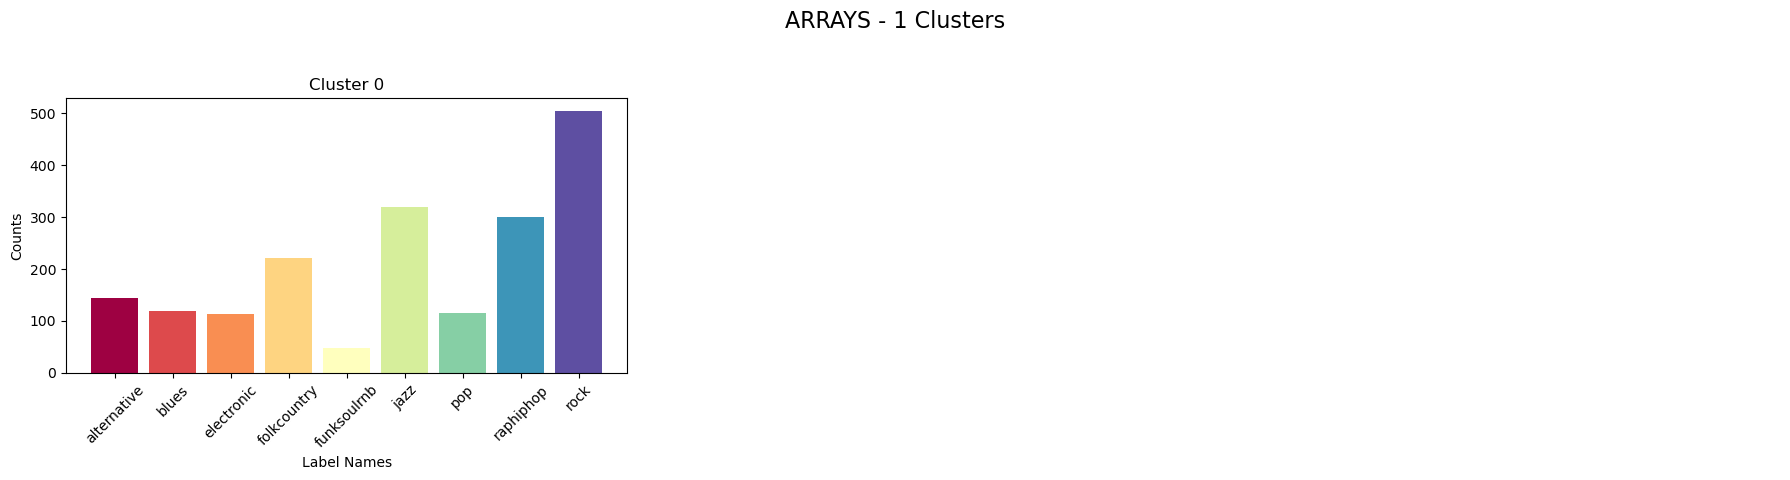

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-ARRAYS-dbscan-1-pca-False.png


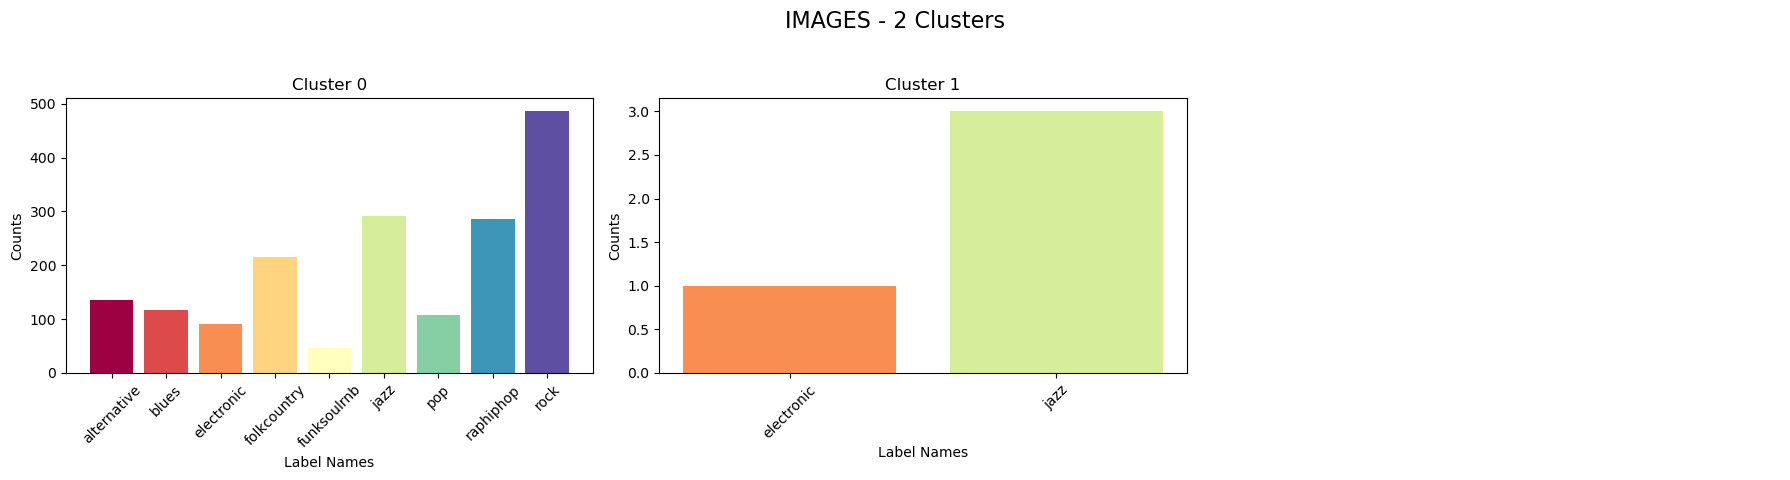

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-IMAGES-dbscan-2-pca-False.png


In [48]:
dbscan_analysis_results = analyze_dbscan_results(dbscan_data, ORIGINAL_LABELS, CLUSTER_NAMES)
plot_barplots(dbscan_analysis_results, CLUSTER_NAMES, 'dbscan')

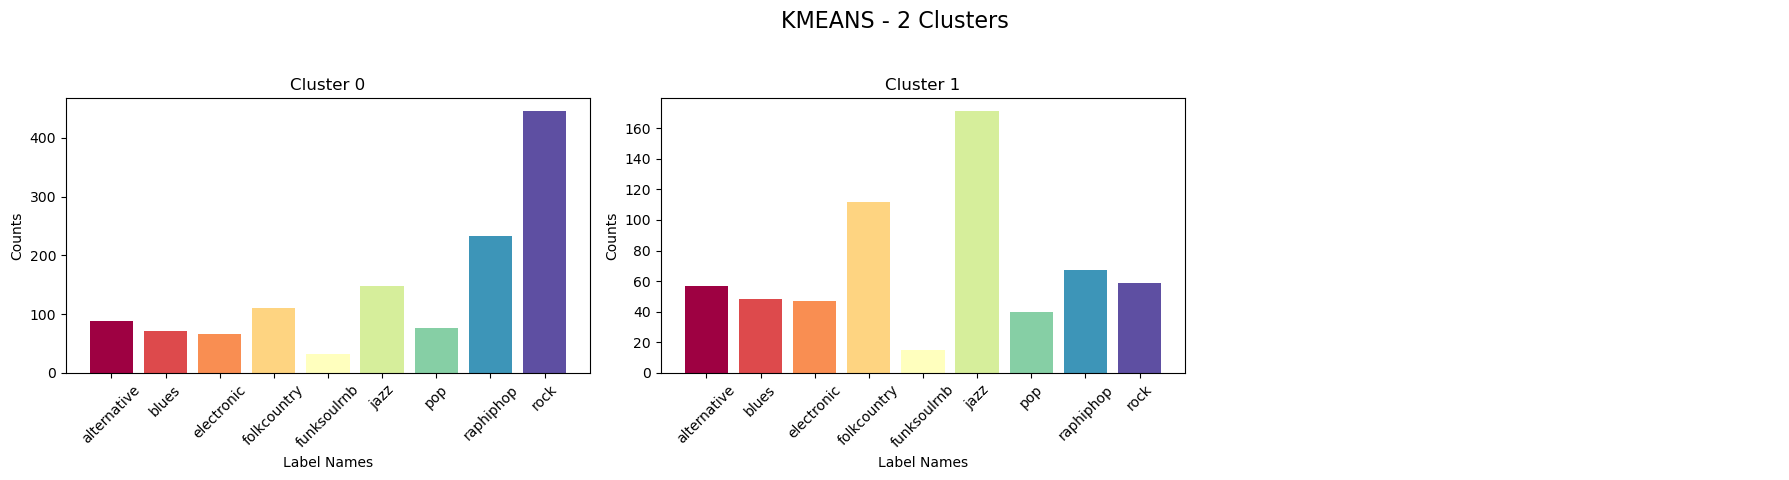

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-KMEANS-arrays-2-pca-False.png


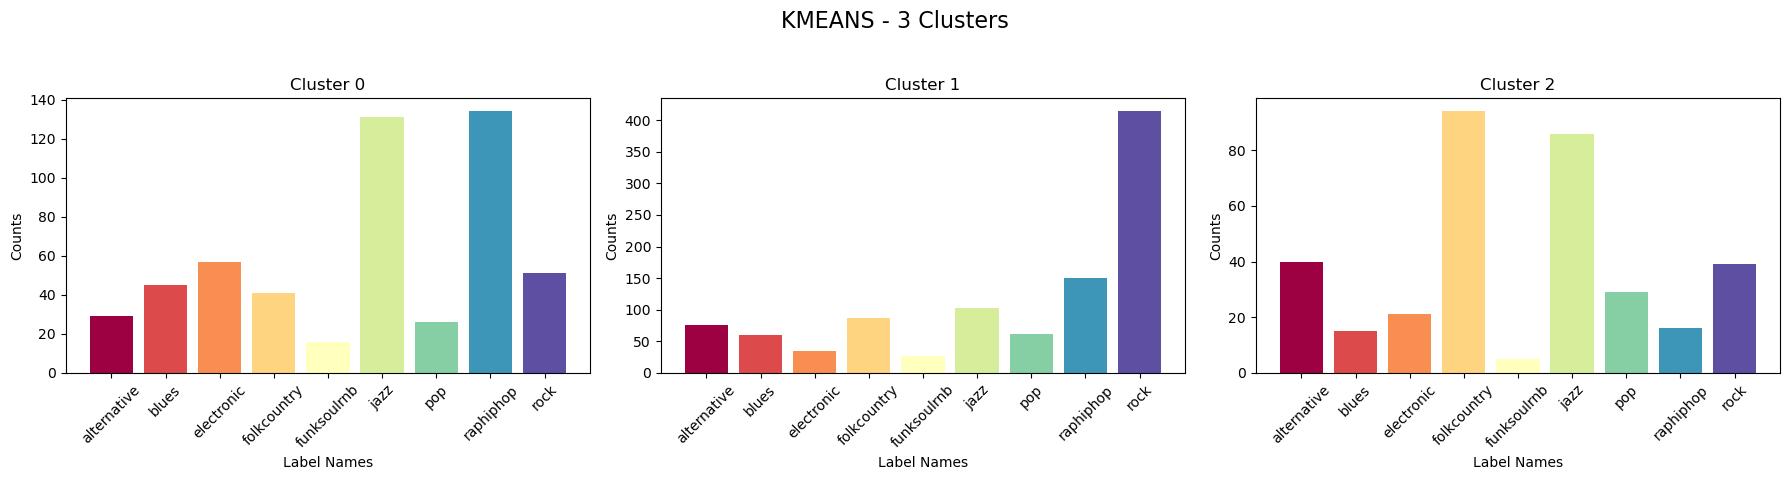

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-KMEANS-arrays-3-pca-False.png


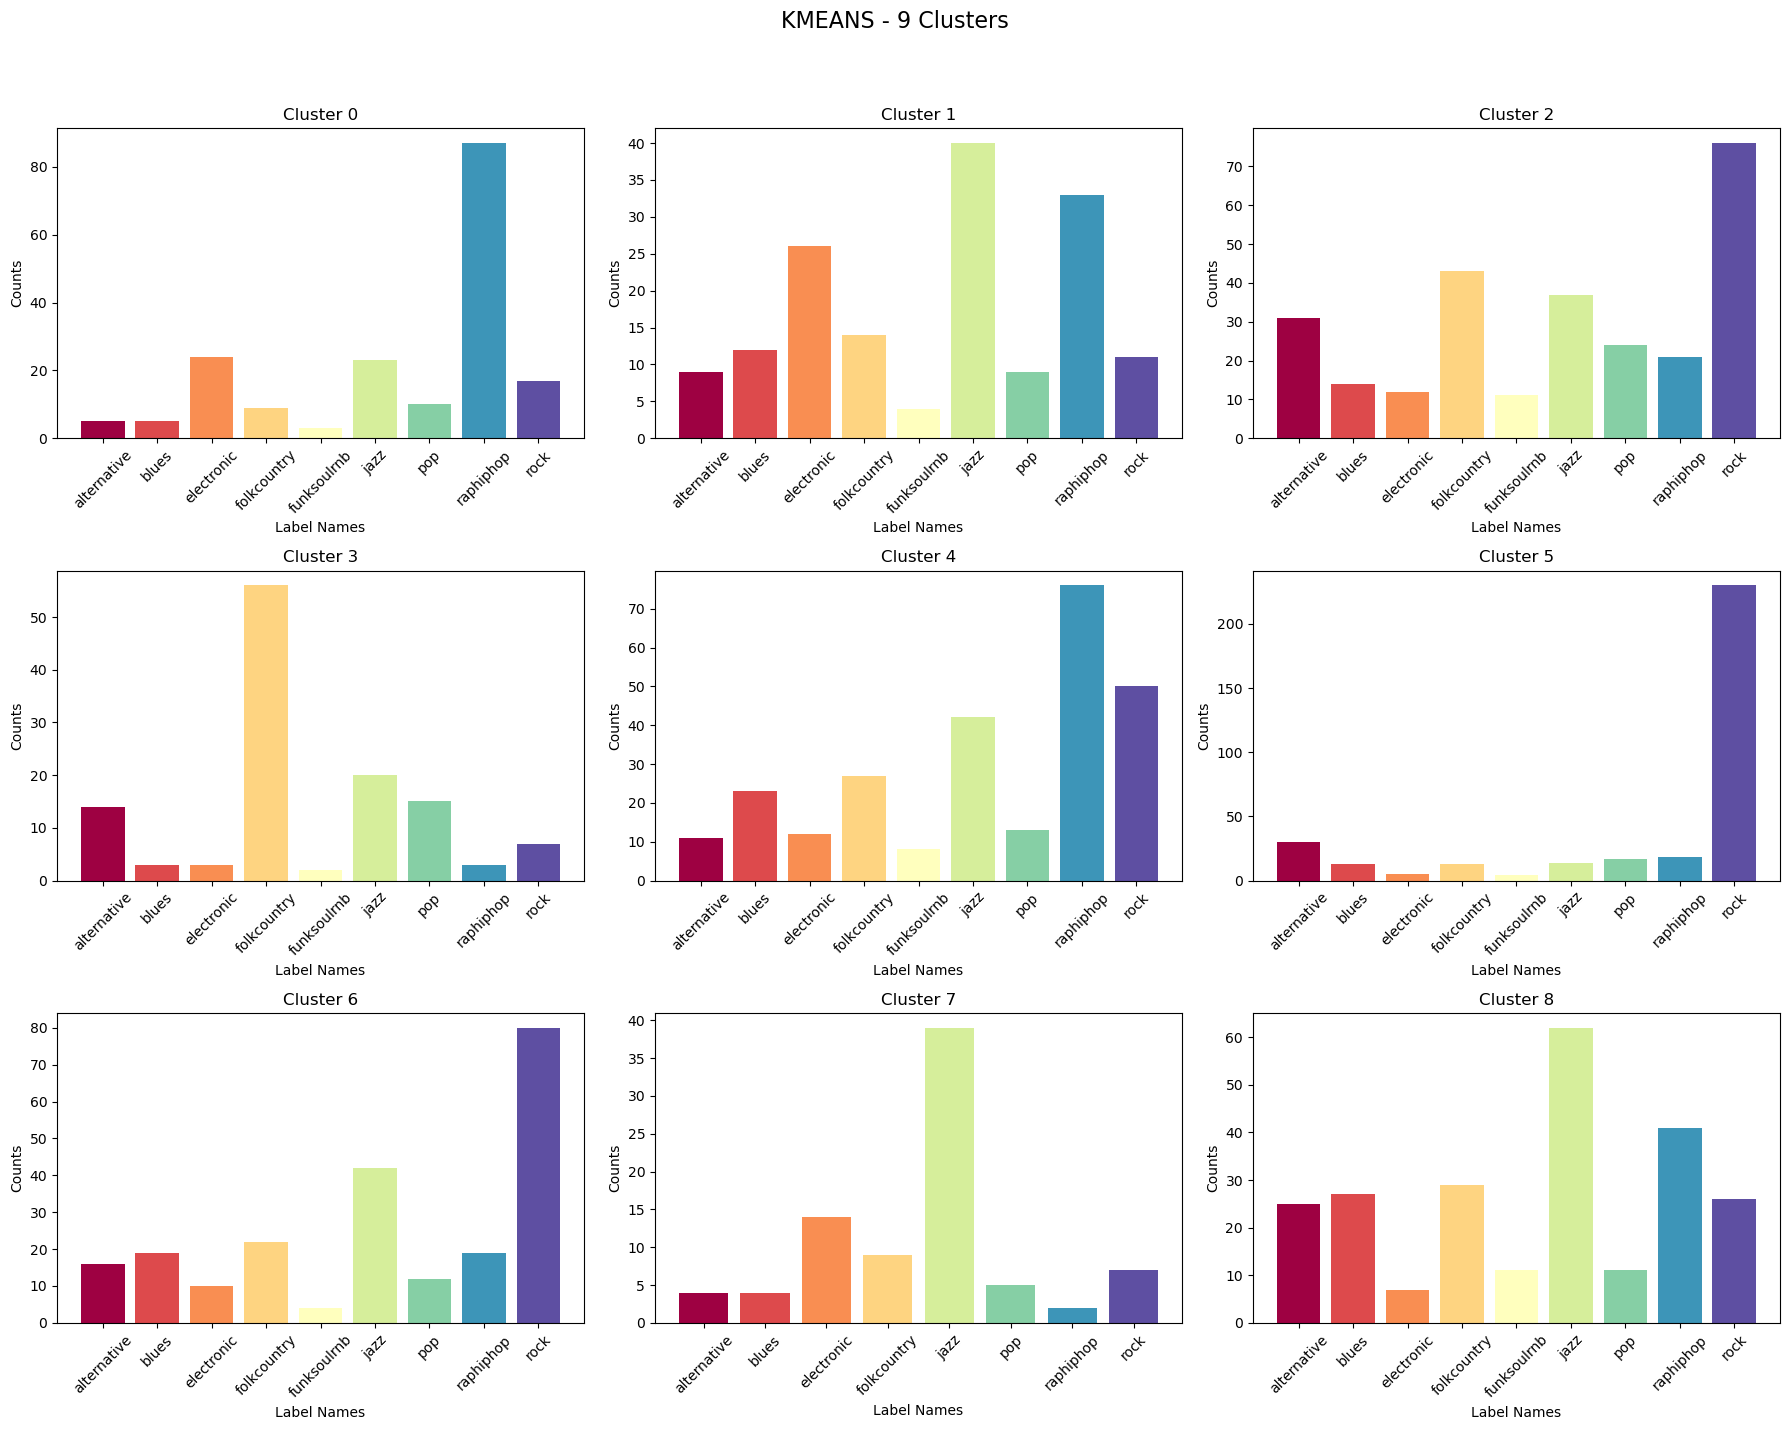

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-KMEANS-arrays-9-pca-False.png


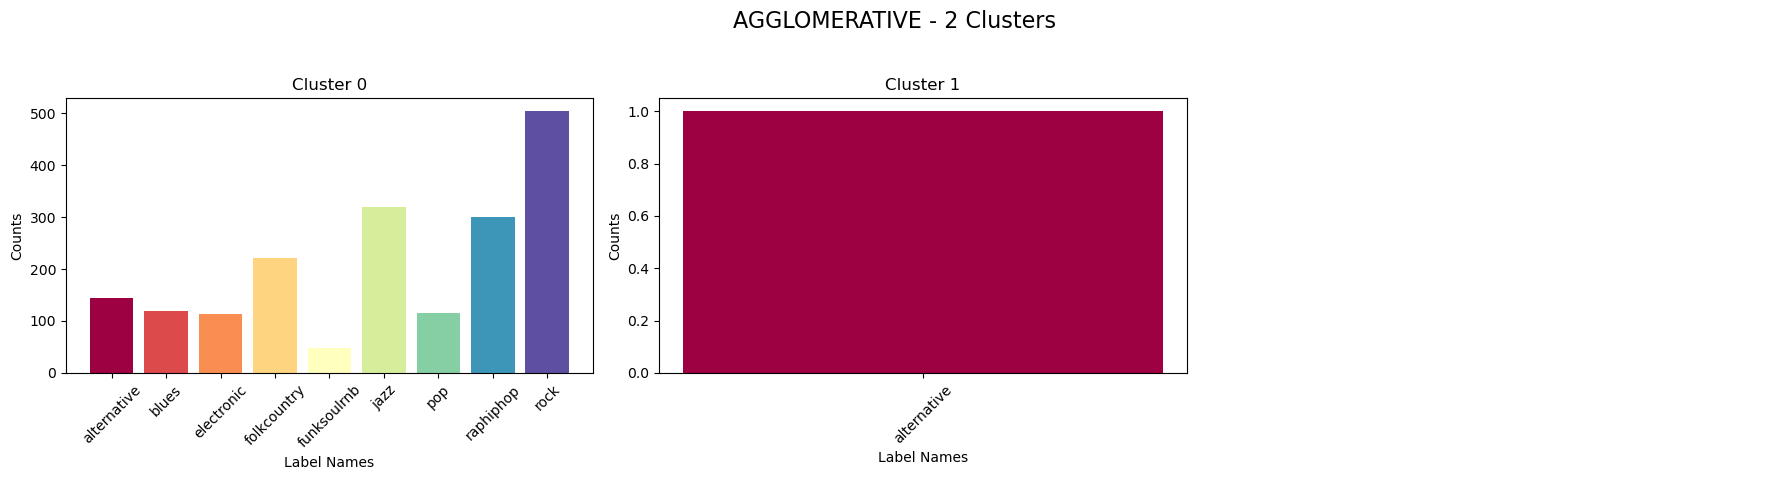

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-AGGLOMERATIVE-arrays-2-pca-False.png


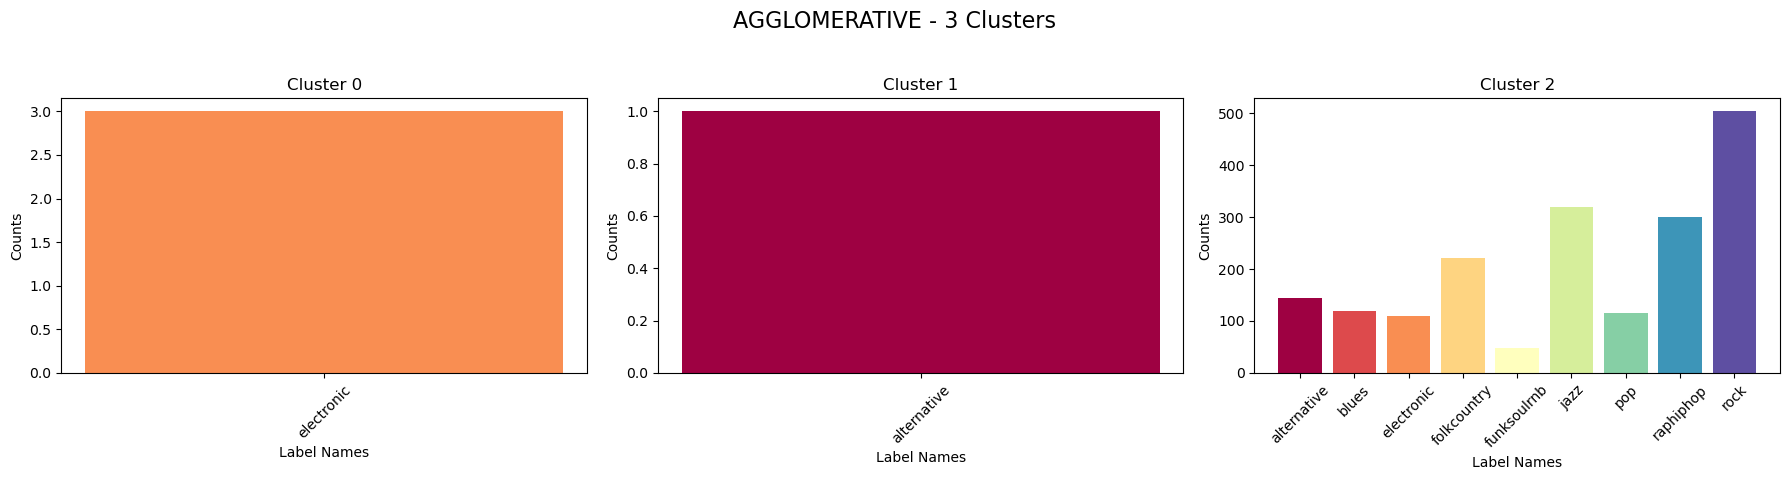

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-AGGLOMERATIVE-arrays-3-pca-False.png


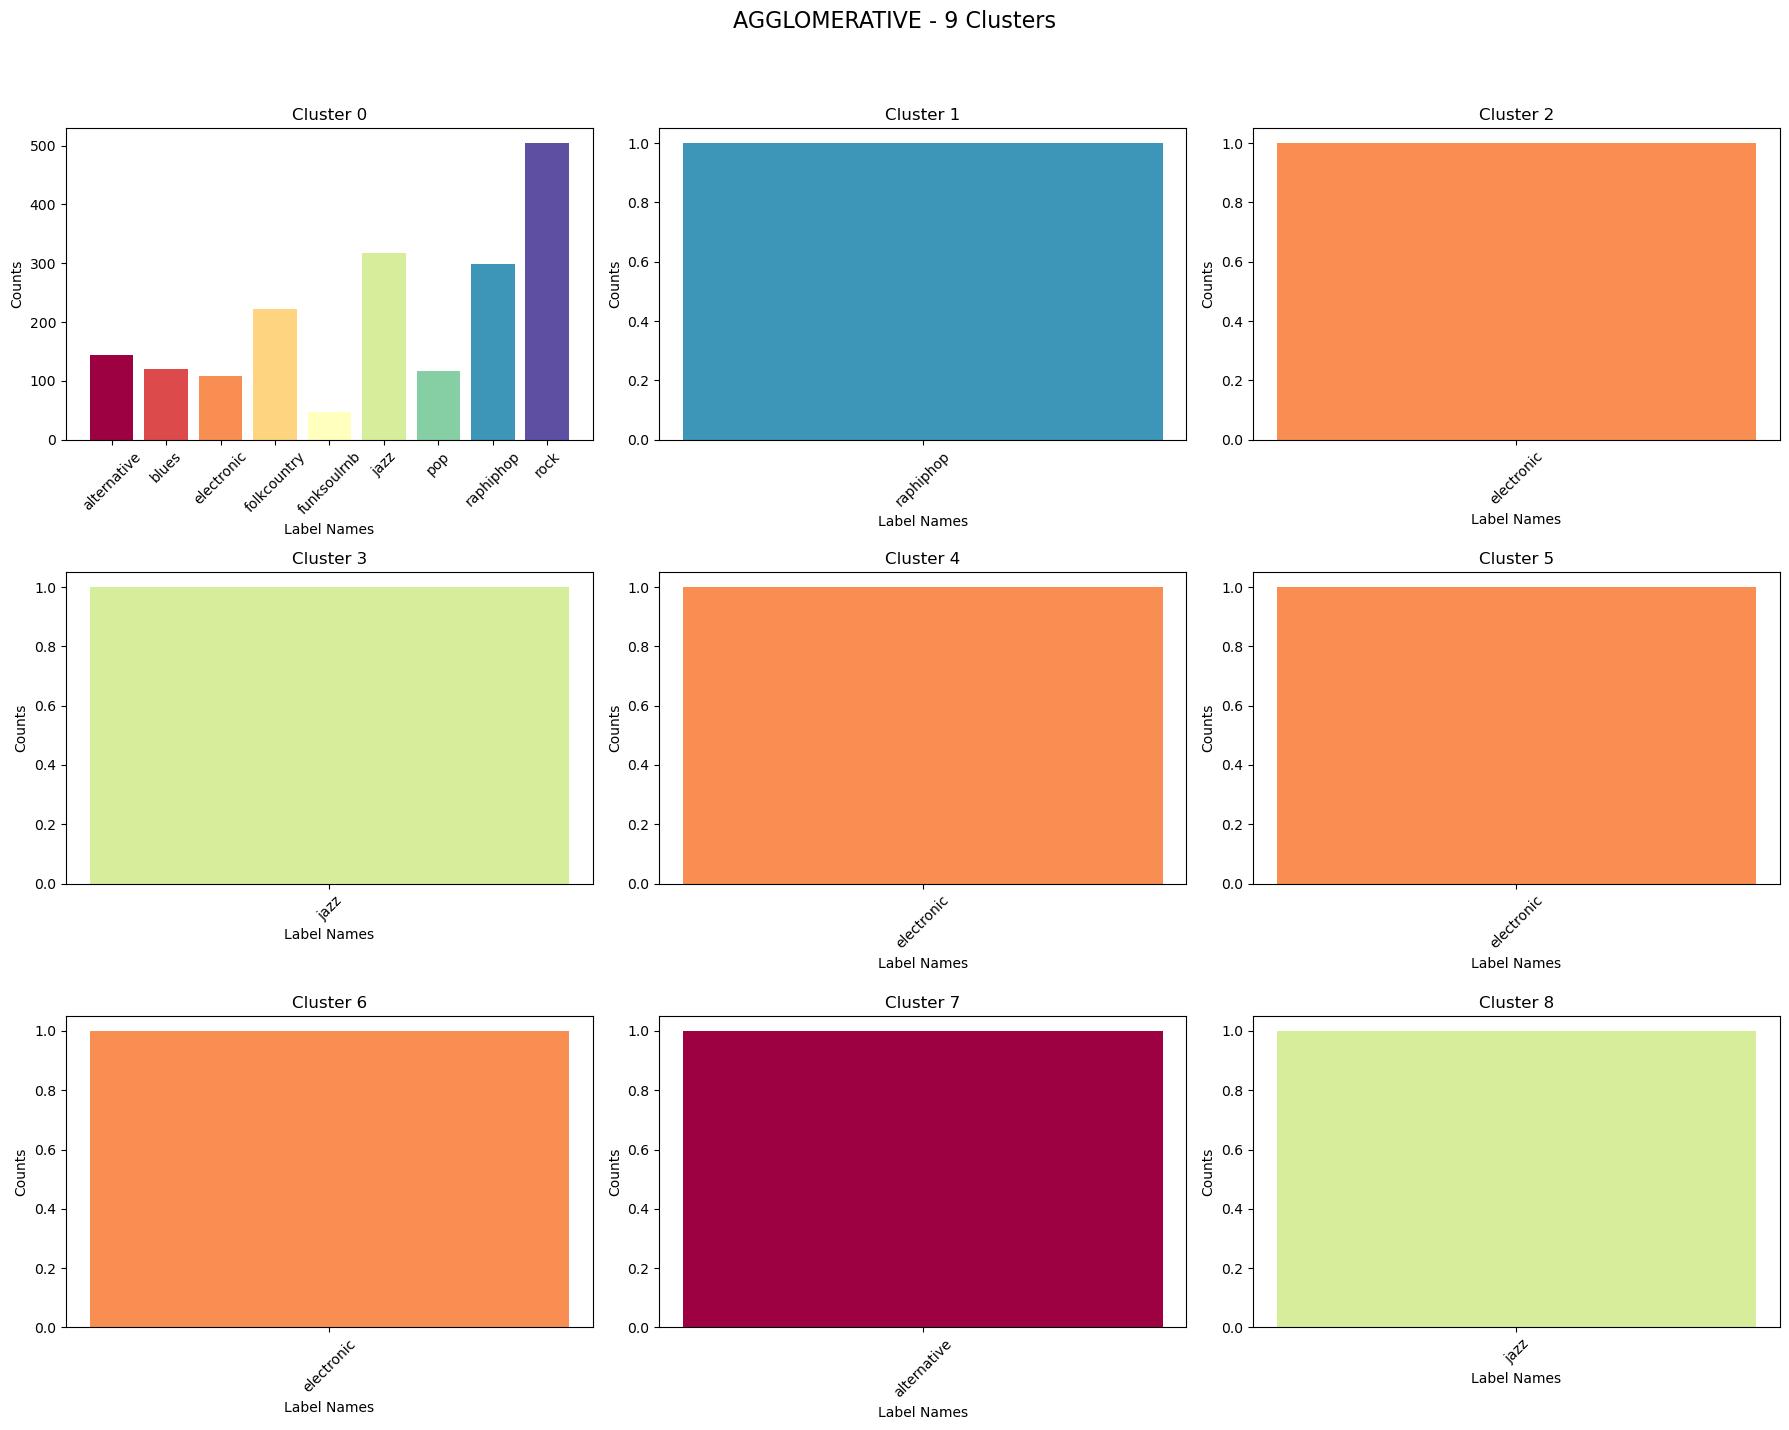

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-AGGLOMERATIVE-arrays-9-pca-False.png


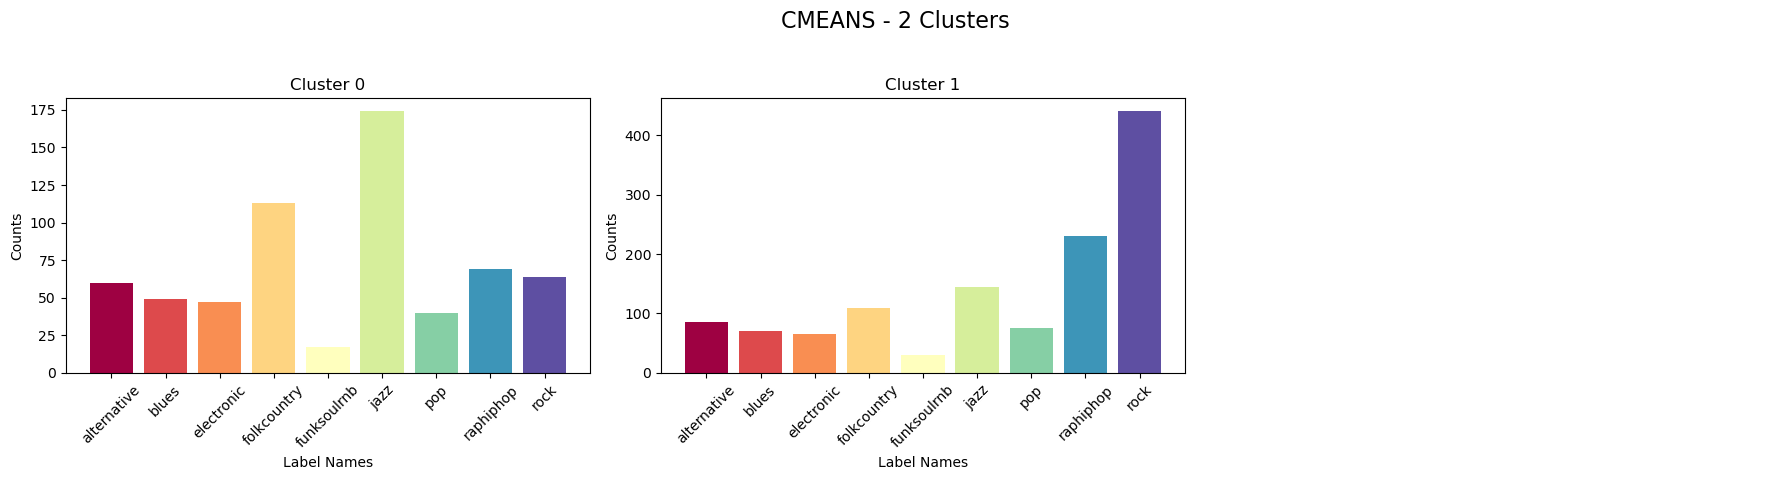

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-CMEANS-arrays-2-pca-False.png


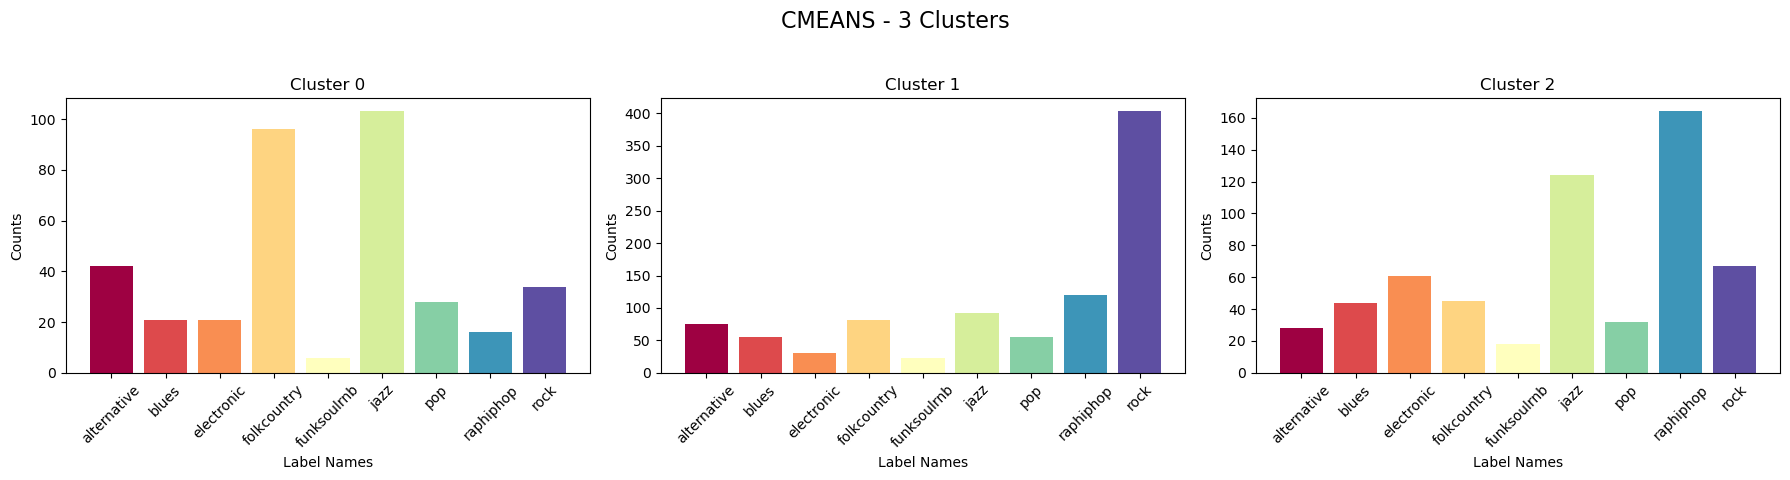

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-CMEANS-arrays-3-pca-False.png


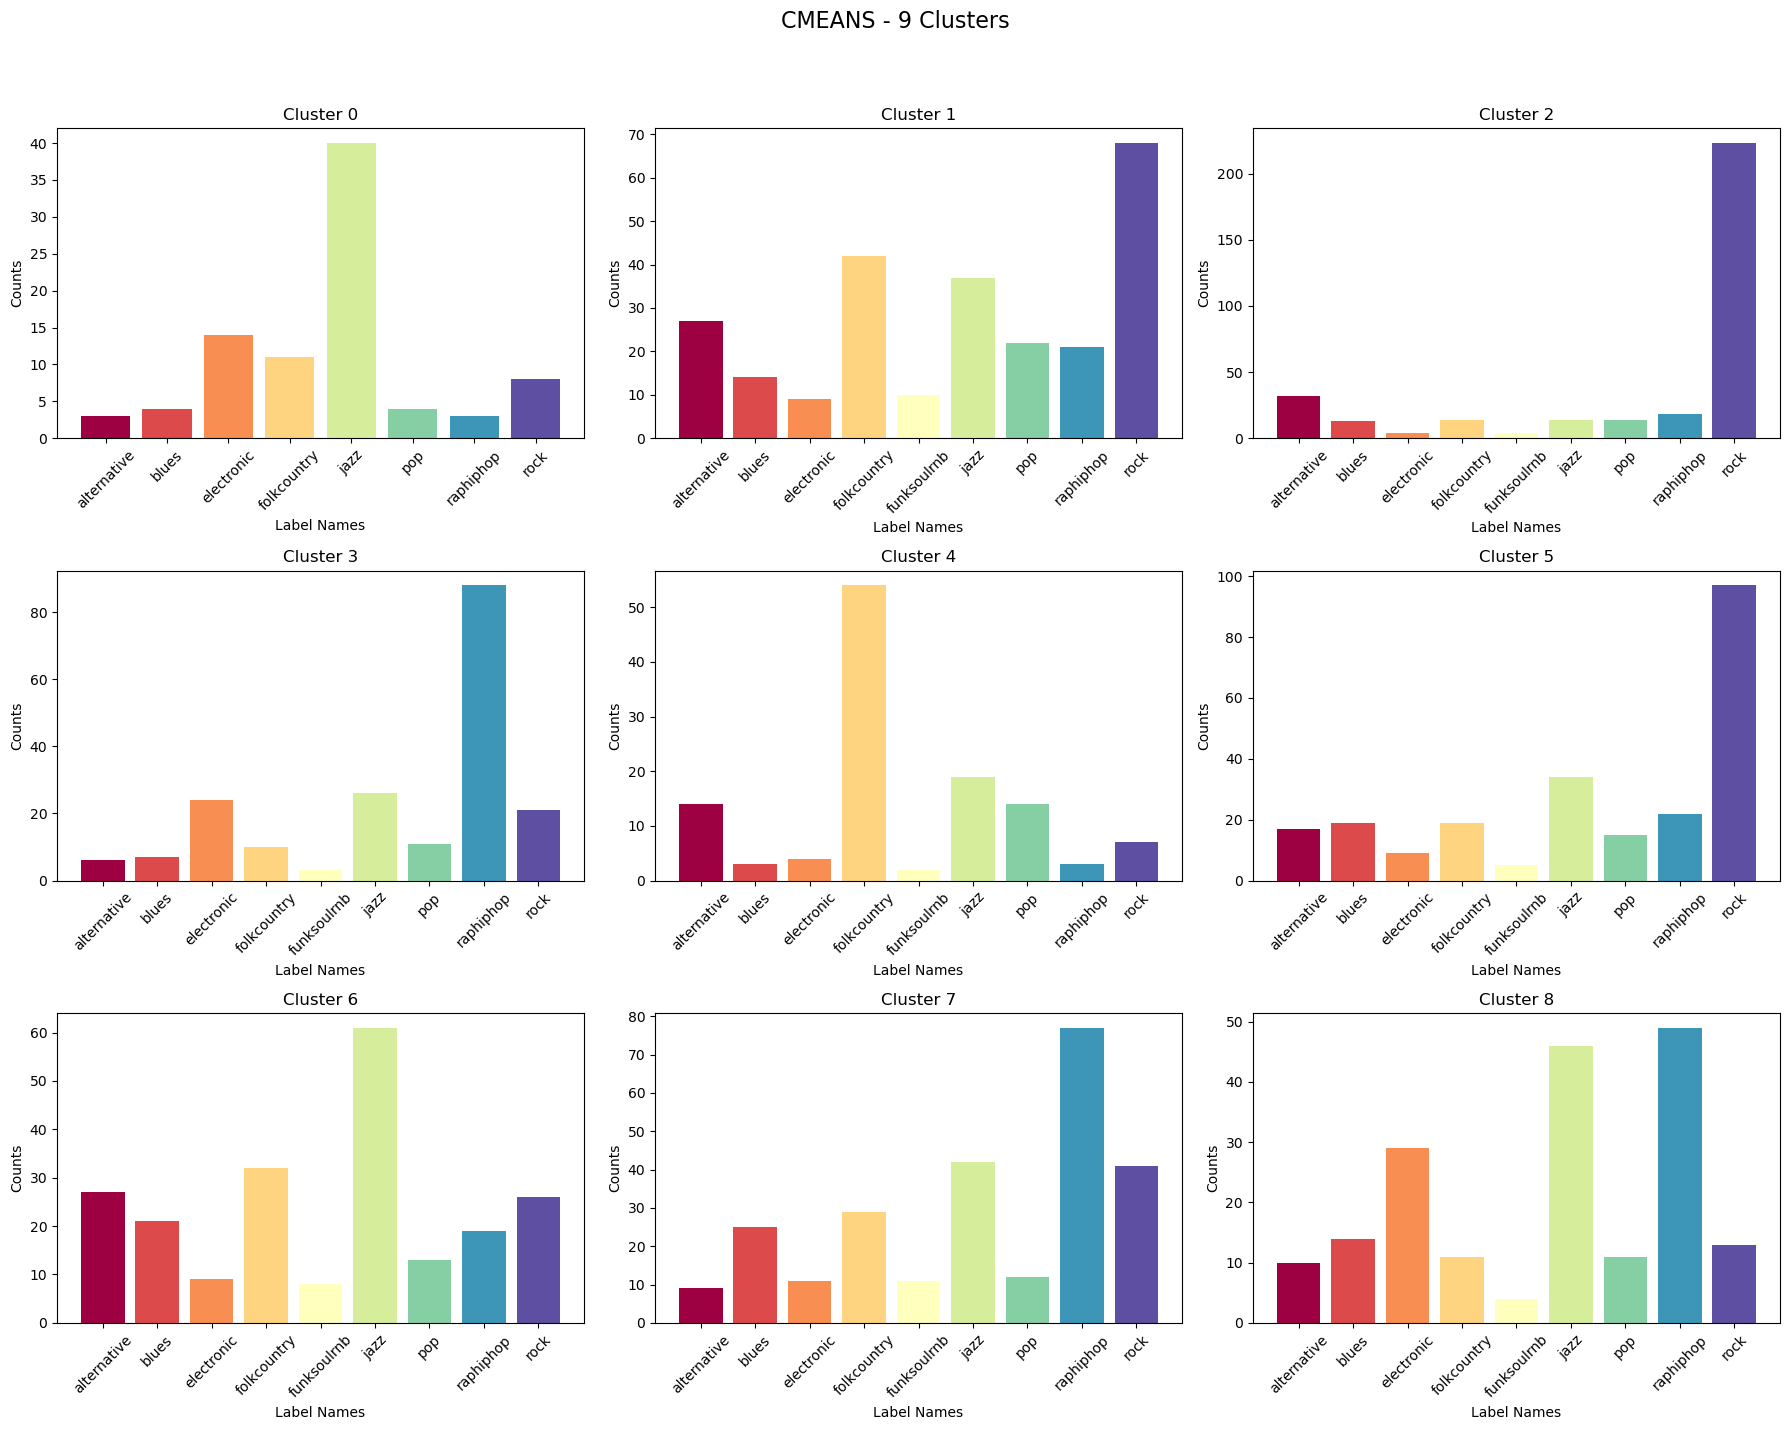

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-CMEANS-arrays-9-pca-False.png


In [49]:
array_clustering_analysis_arr = analyze_clustering_results(label_dicts_arr, ORIGINAL_LABELS, CLUSTER_NAMES)
plot_barplots(array_clustering_analysis_arr, CLUSTER_NAMES, 'arrays')

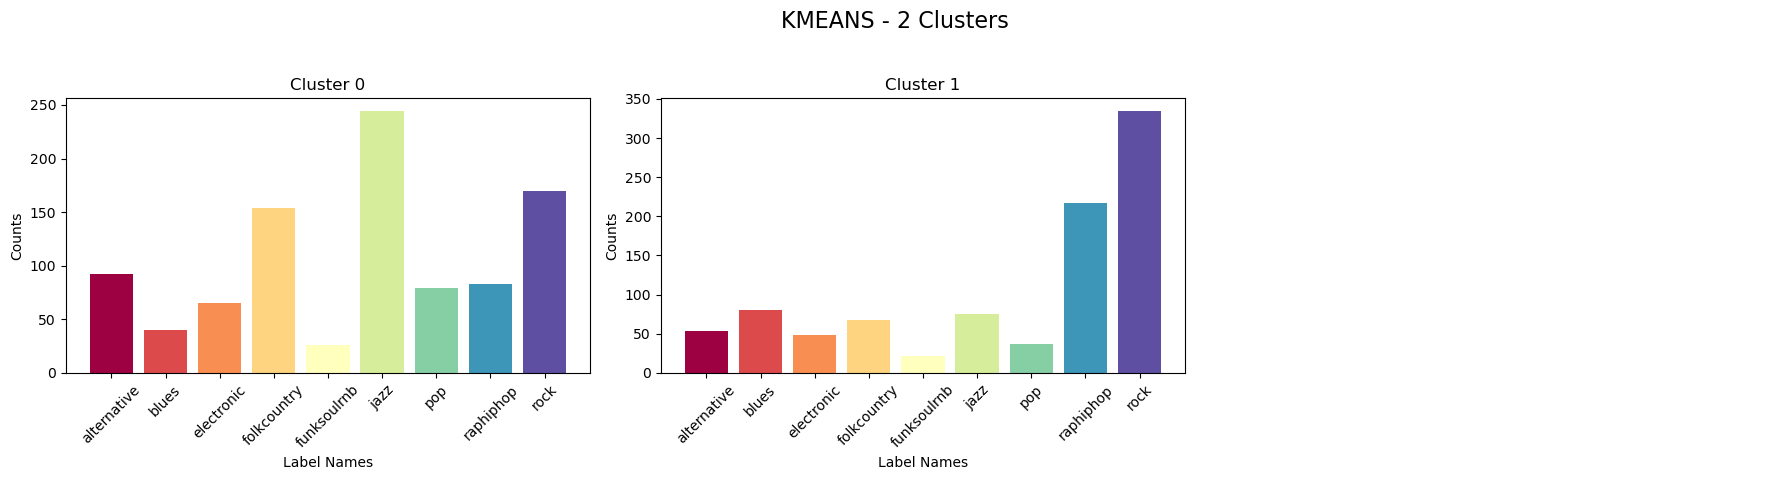

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-KMEANS-images-2-pca-False.png


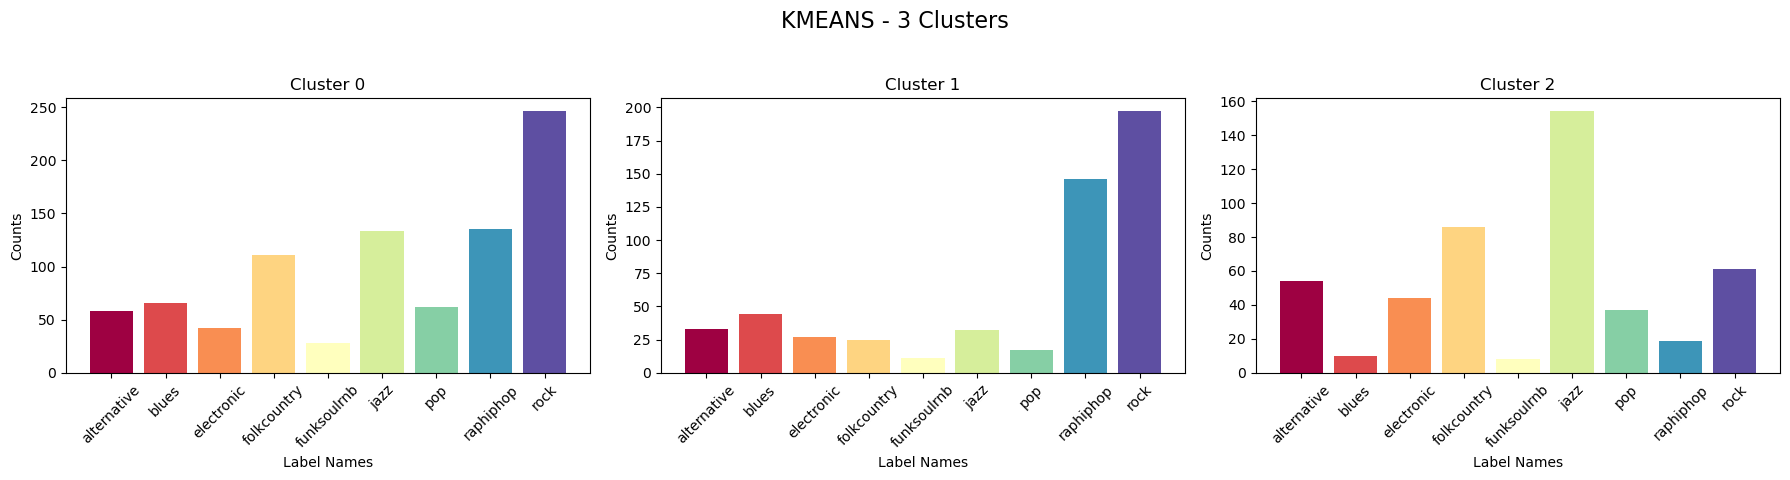

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-KMEANS-images-3-pca-False.png


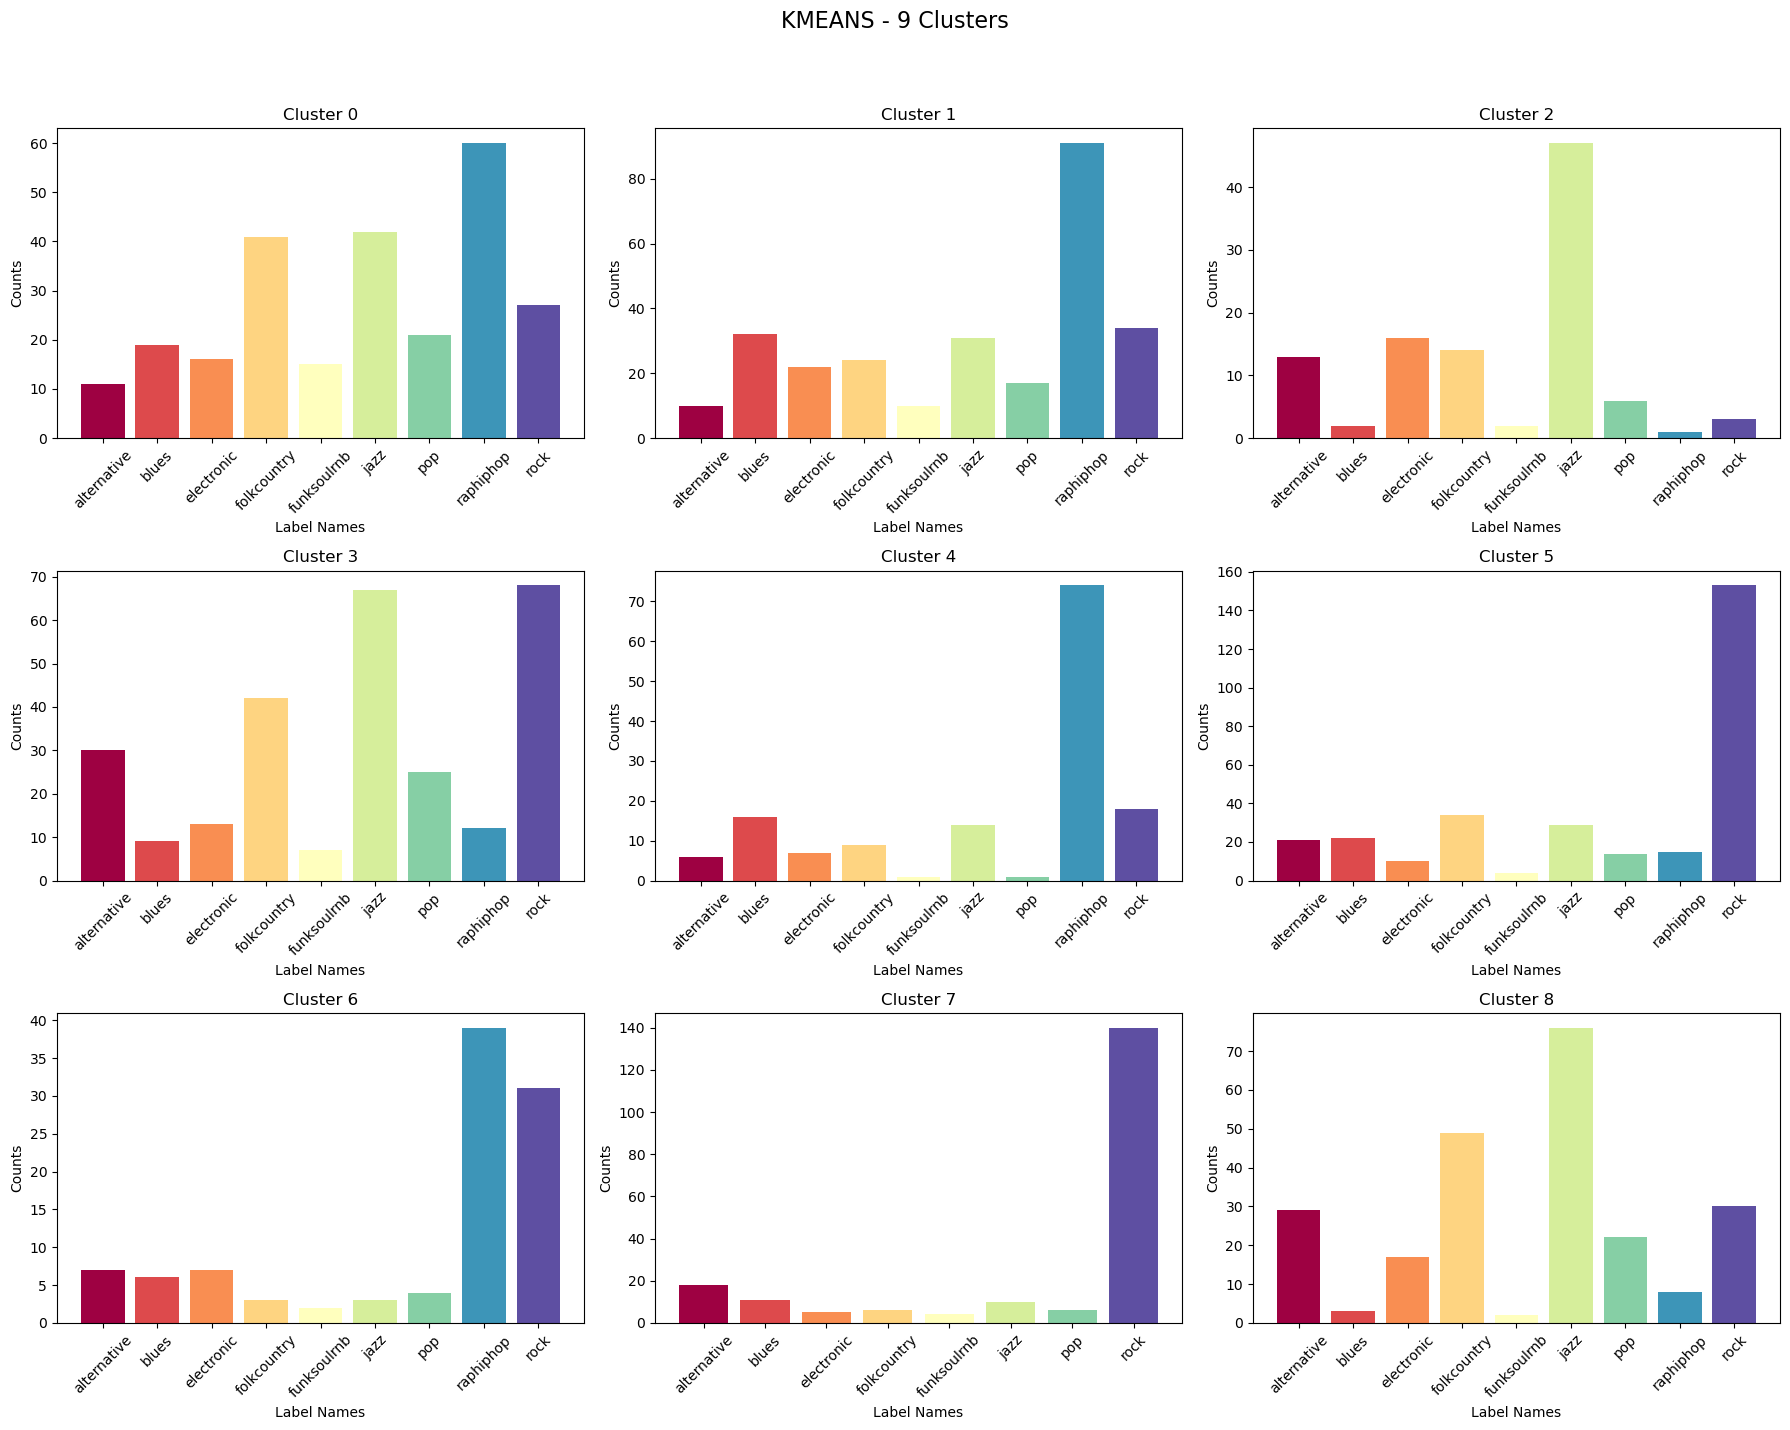

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-KMEANS-images-9-pca-False.png


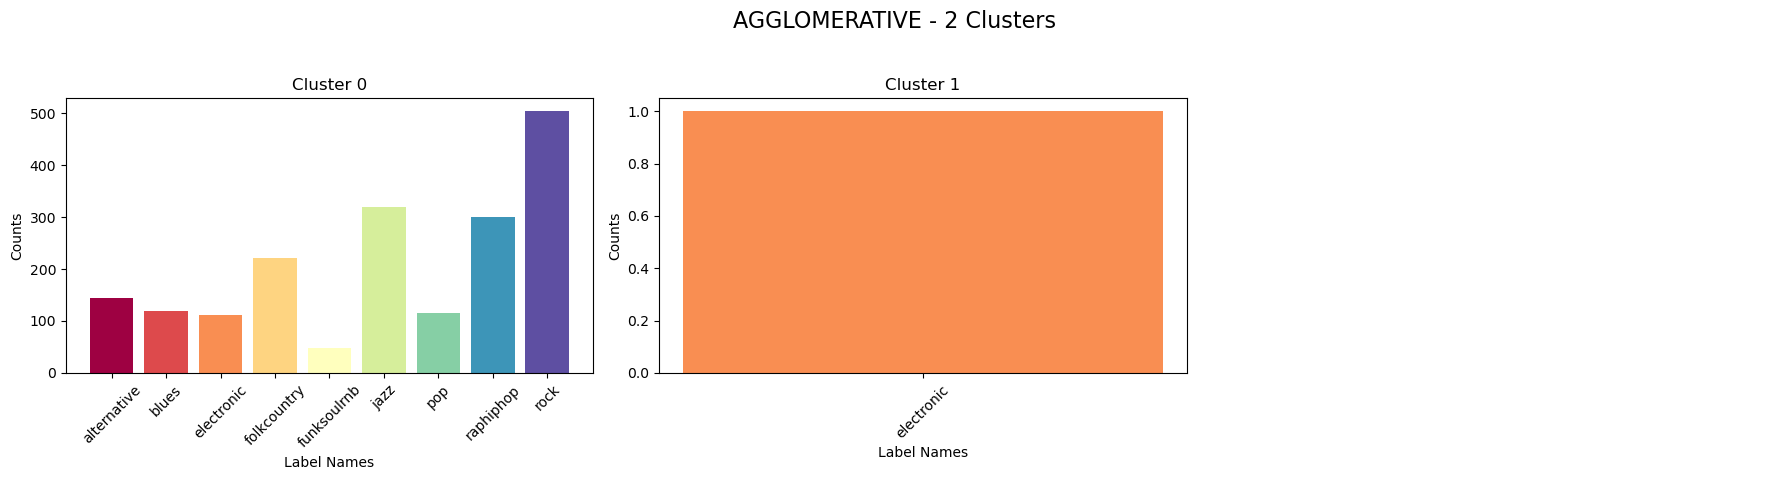

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-AGGLOMERATIVE-images-2-pca-False.png


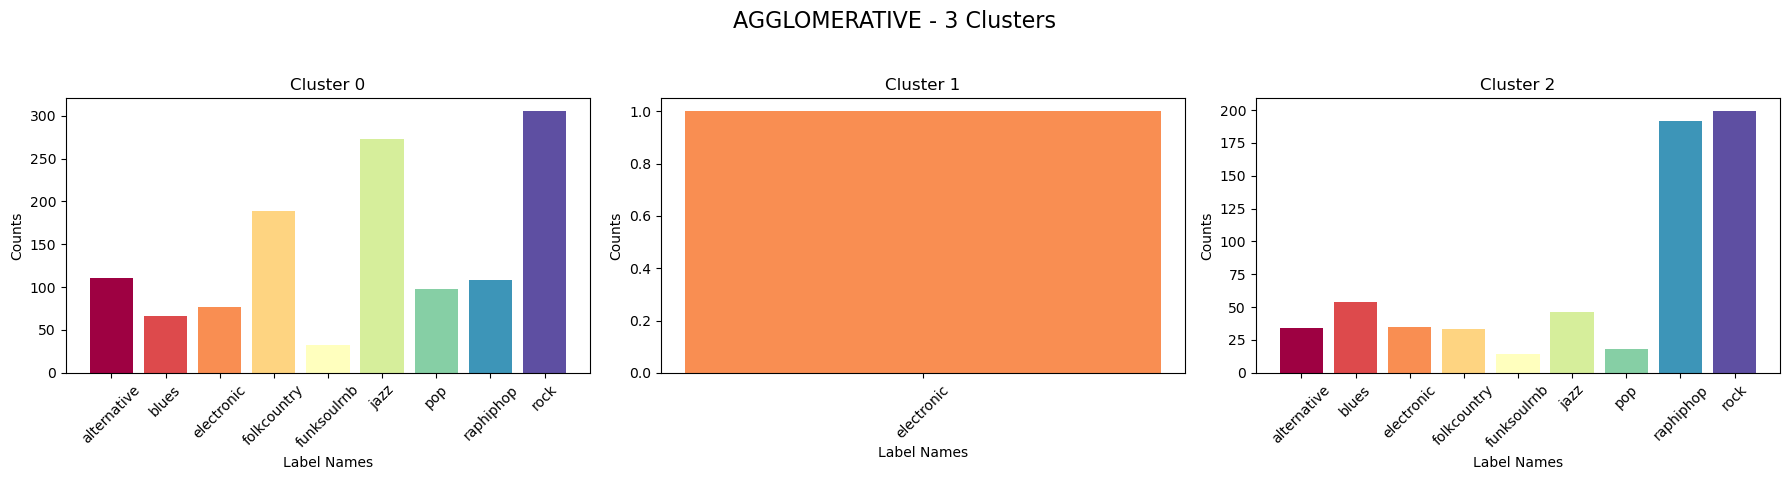

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-AGGLOMERATIVE-images-3-pca-False.png


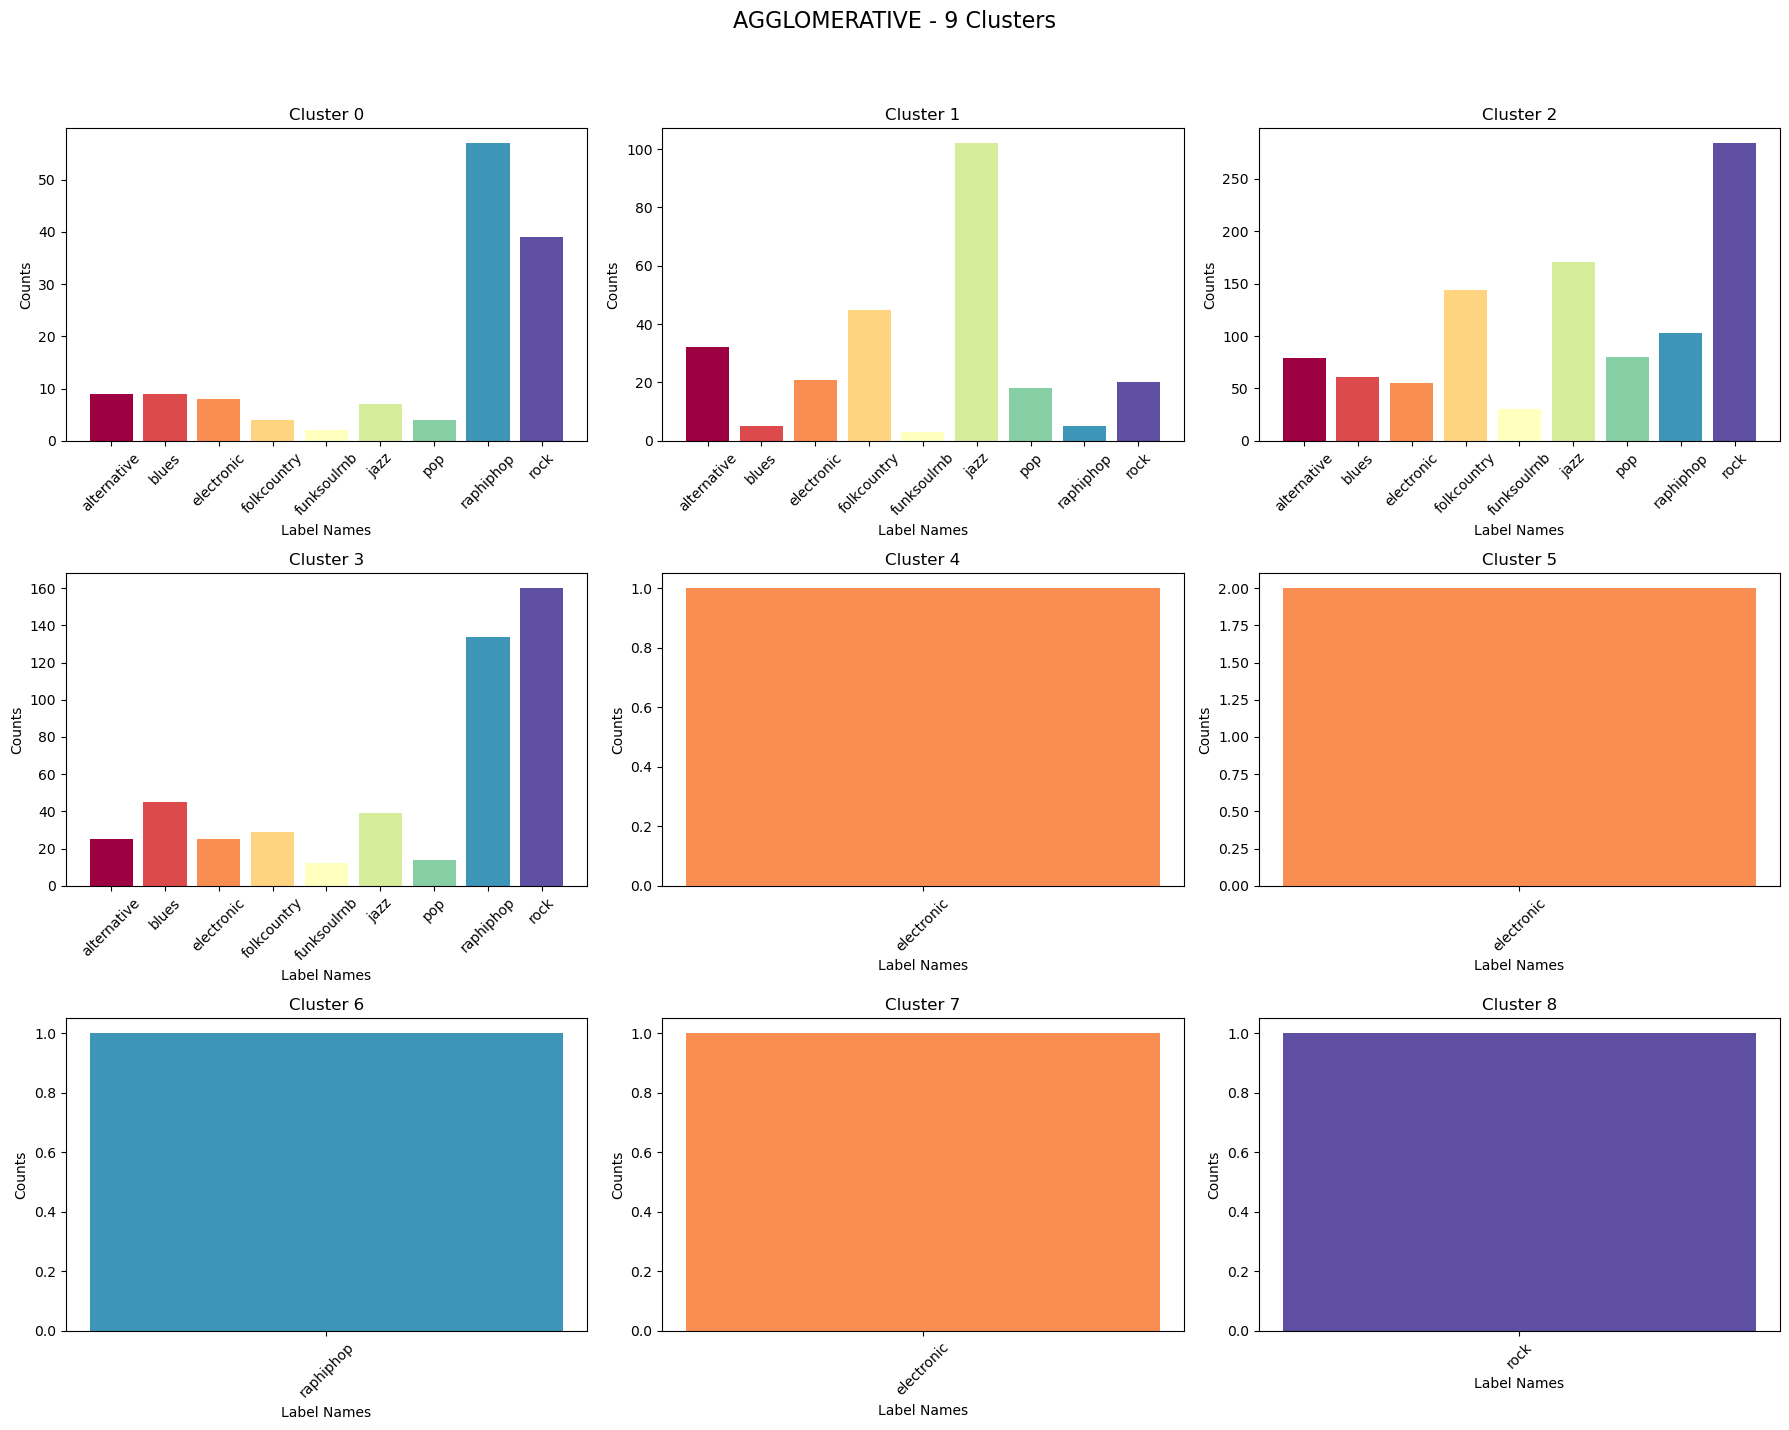

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-AGGLOMERATIVE-images-9-pca-False.png


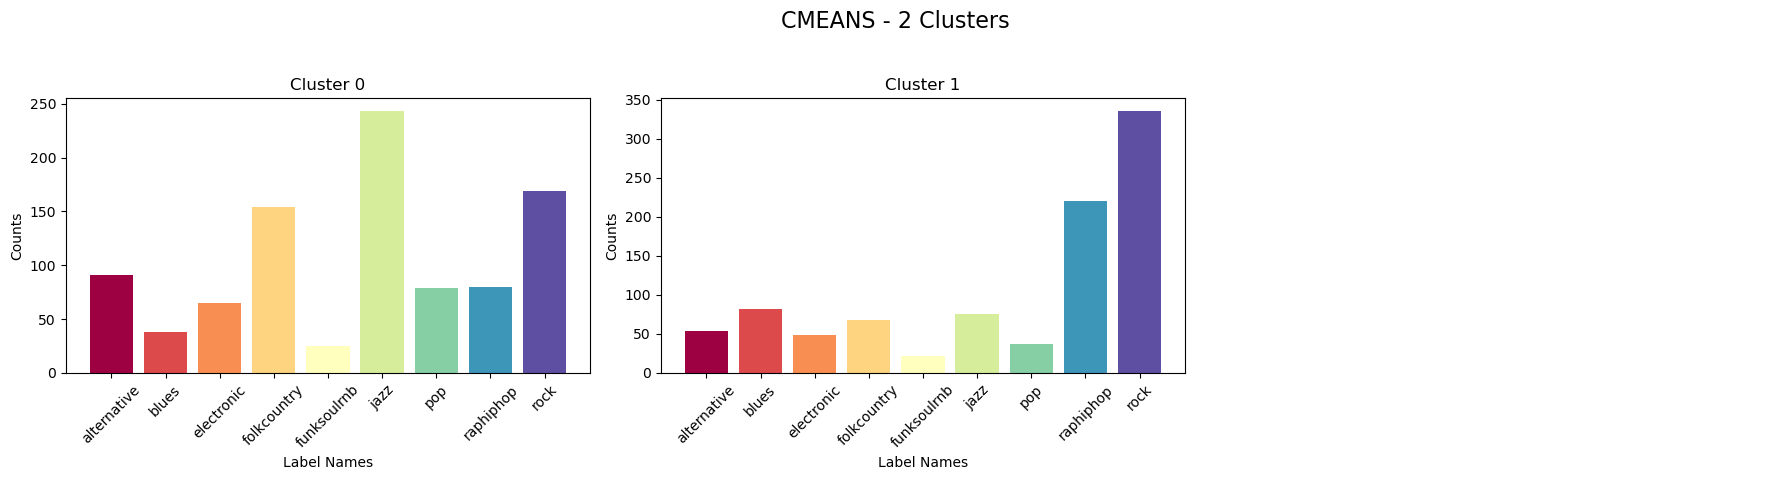

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-CMEANS-images-2-pca-False.png


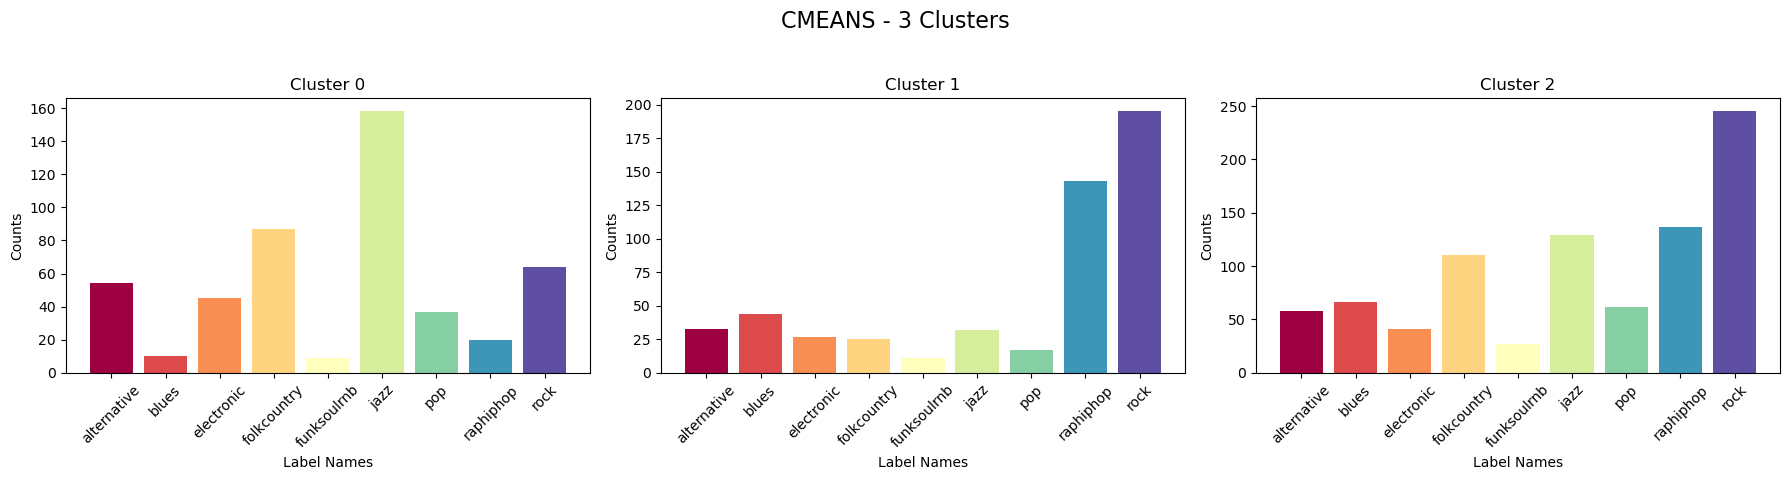

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-CMEANS-images-3-pca-False.png


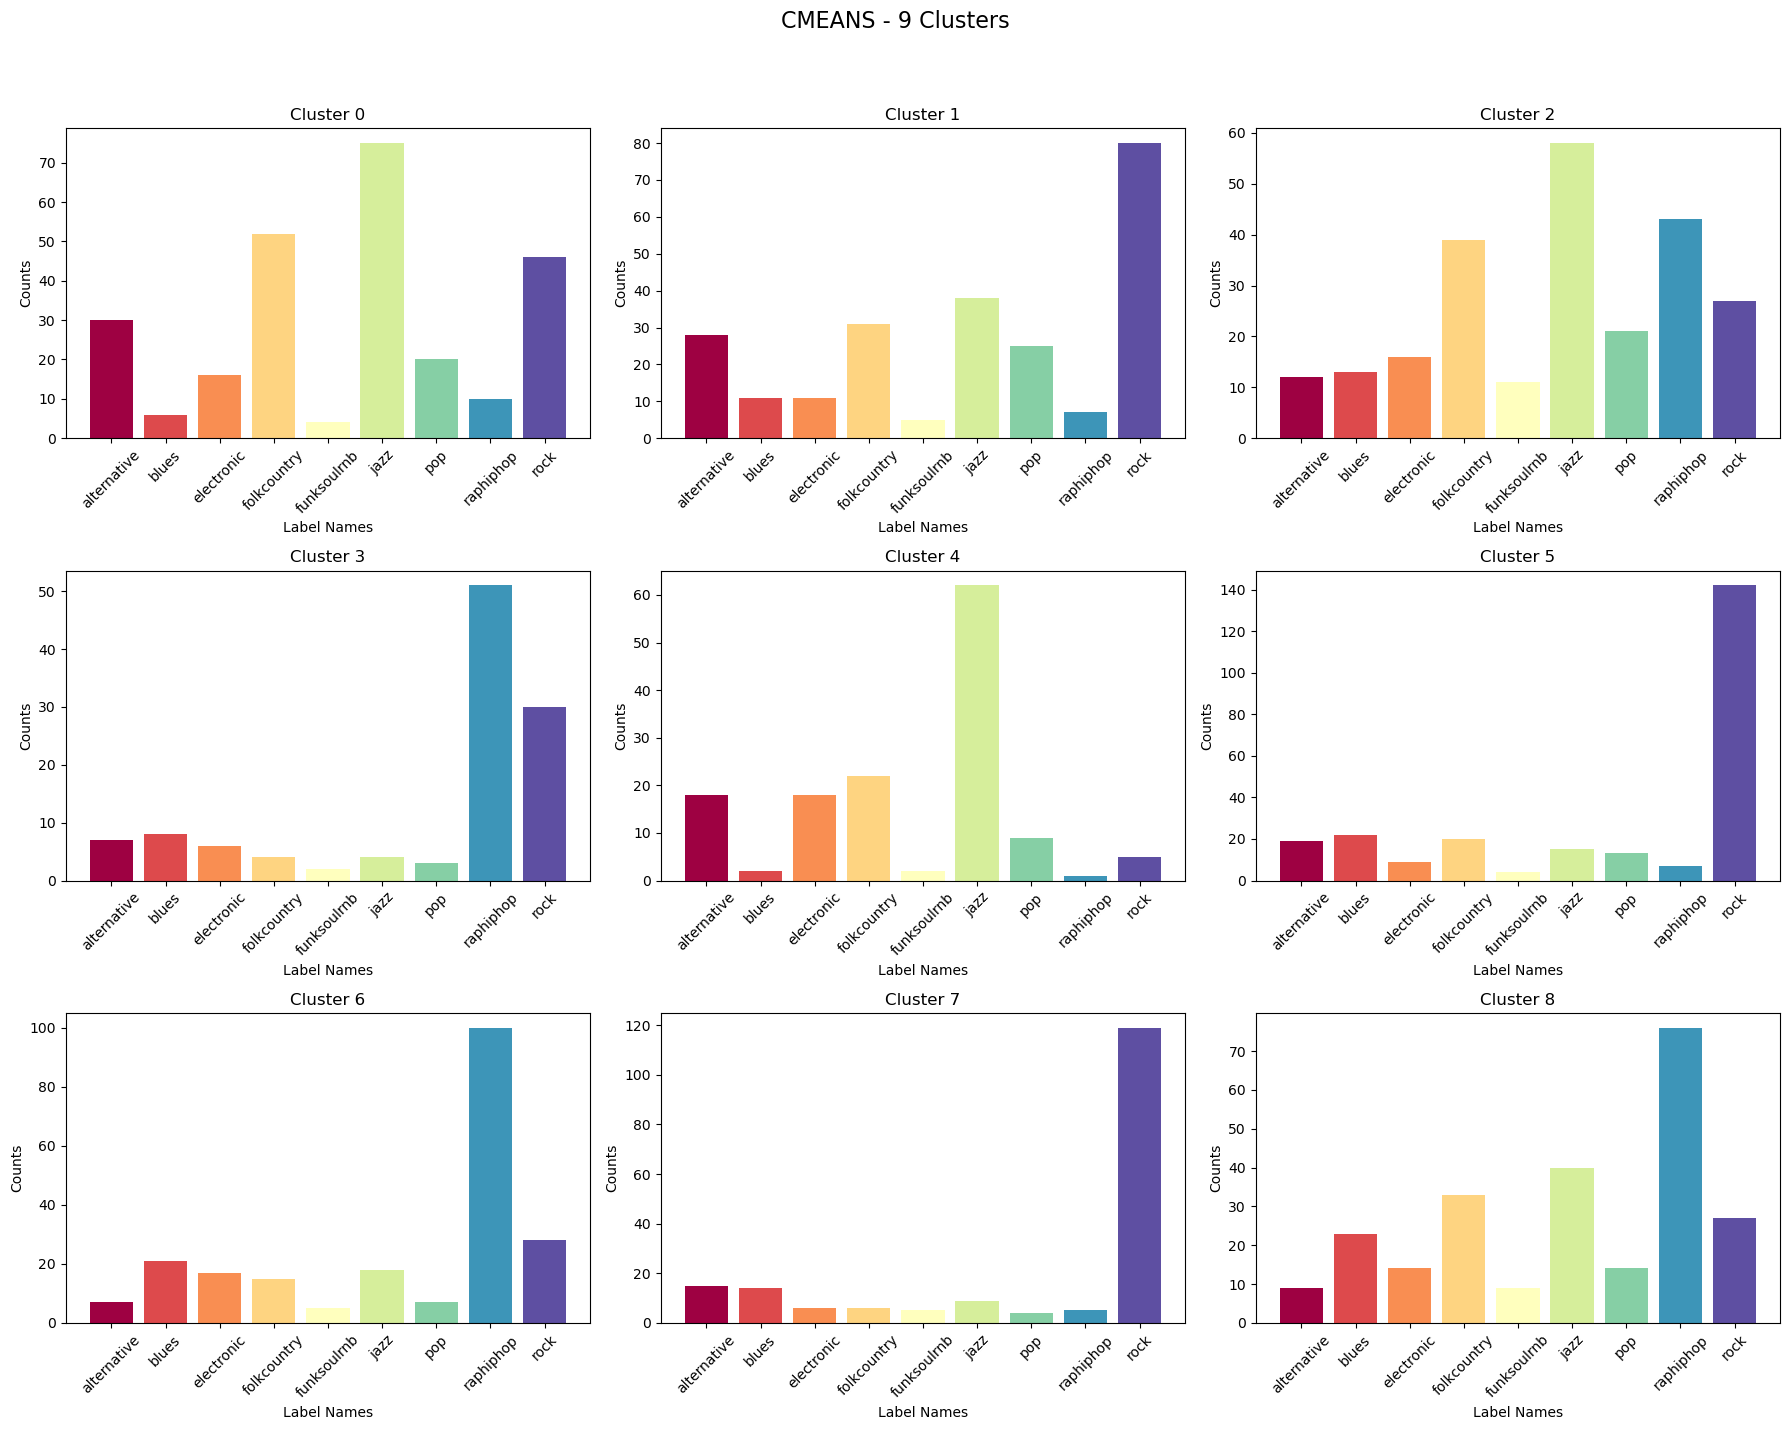

Plot saved as ..\results\music_audio_benchmark\mfccs_without_0\barplots-CMEANS-images-9-pca-False.png


In [50]:
array_clustering_analysis_img = analyze_clustering_results(label_dicts_img, ORIGINAL_LABELS, CLUSTER_NAMES)
plot_barplots(array_clustering_analysis_img, CLUSTER_NAMES, 'images')

In [51]:
# pretty_print_analysis(array_clustering_analysis_img)